# Import block

In [1]:
from ase.io import read
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
from ase.visualize import view
import numpy as np
from ase.spacegroup import crystal
from ase import Atoms, Atom
from ase.build import fcc211
import sys
import ase
import time
import os
from json import load
import csv
from scipy.optimize import fmin
from copy import deepcopy as copy
from ase.constraints import FixAtoms
import pandas as pd
import glob
from ase.build import add_adsorbate
#!pip install nglview #this needs to be install to visualize structures through jupyter notebook
#!jupyter-nbextension enable nglview --py --sys-prefix  # this might be needed
%matplotlib inline

In [1]:
import os
import numpy as np

home_dir = '/home/lucas/githubRepos/MCSH_C_Implementation/GMP/modular_c_gmp/'
os.chdir(home_dir)
fps = np.genfromtxt('./all_fps.txt',delimiter=',')
print(fps[0:15,:])

[[0.00000000e+00 0.00000000e+00 7.24945980e+01]
 [0.00000000e+00 1.00000000e+00 6.68150300e+00]
 [0.00000000e+00 2.00000000e+00 3.50603000e-01]
 [0.00000000e+00 3.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.00000000e+00 6.12000000e-04]
 [0.00000000e+00 5.00000000e+00 2.20615900e+00]
 [0.00000000e+00 6.00000000e+00 2.03666876e+02]
 [0.00000000e+00 7.00000000e+00 6.77186700e+00]
 [0.00000000e+00 8.00000000e+00 1.95204562e+03]
 [0.00000000e+00 9.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+01 5.32465000e-01]
 [0.00000000e+00 1.10000000e+01 1.06244721e+06]
 [0.00000000e+00 1.20000000e+01 2.35882908e+04]
 [0.00000000e+00 1.30000000e+01 8.61377592e+02]
 [0.00000000e+00 1.40000000e+01 7.93849421e+09]]


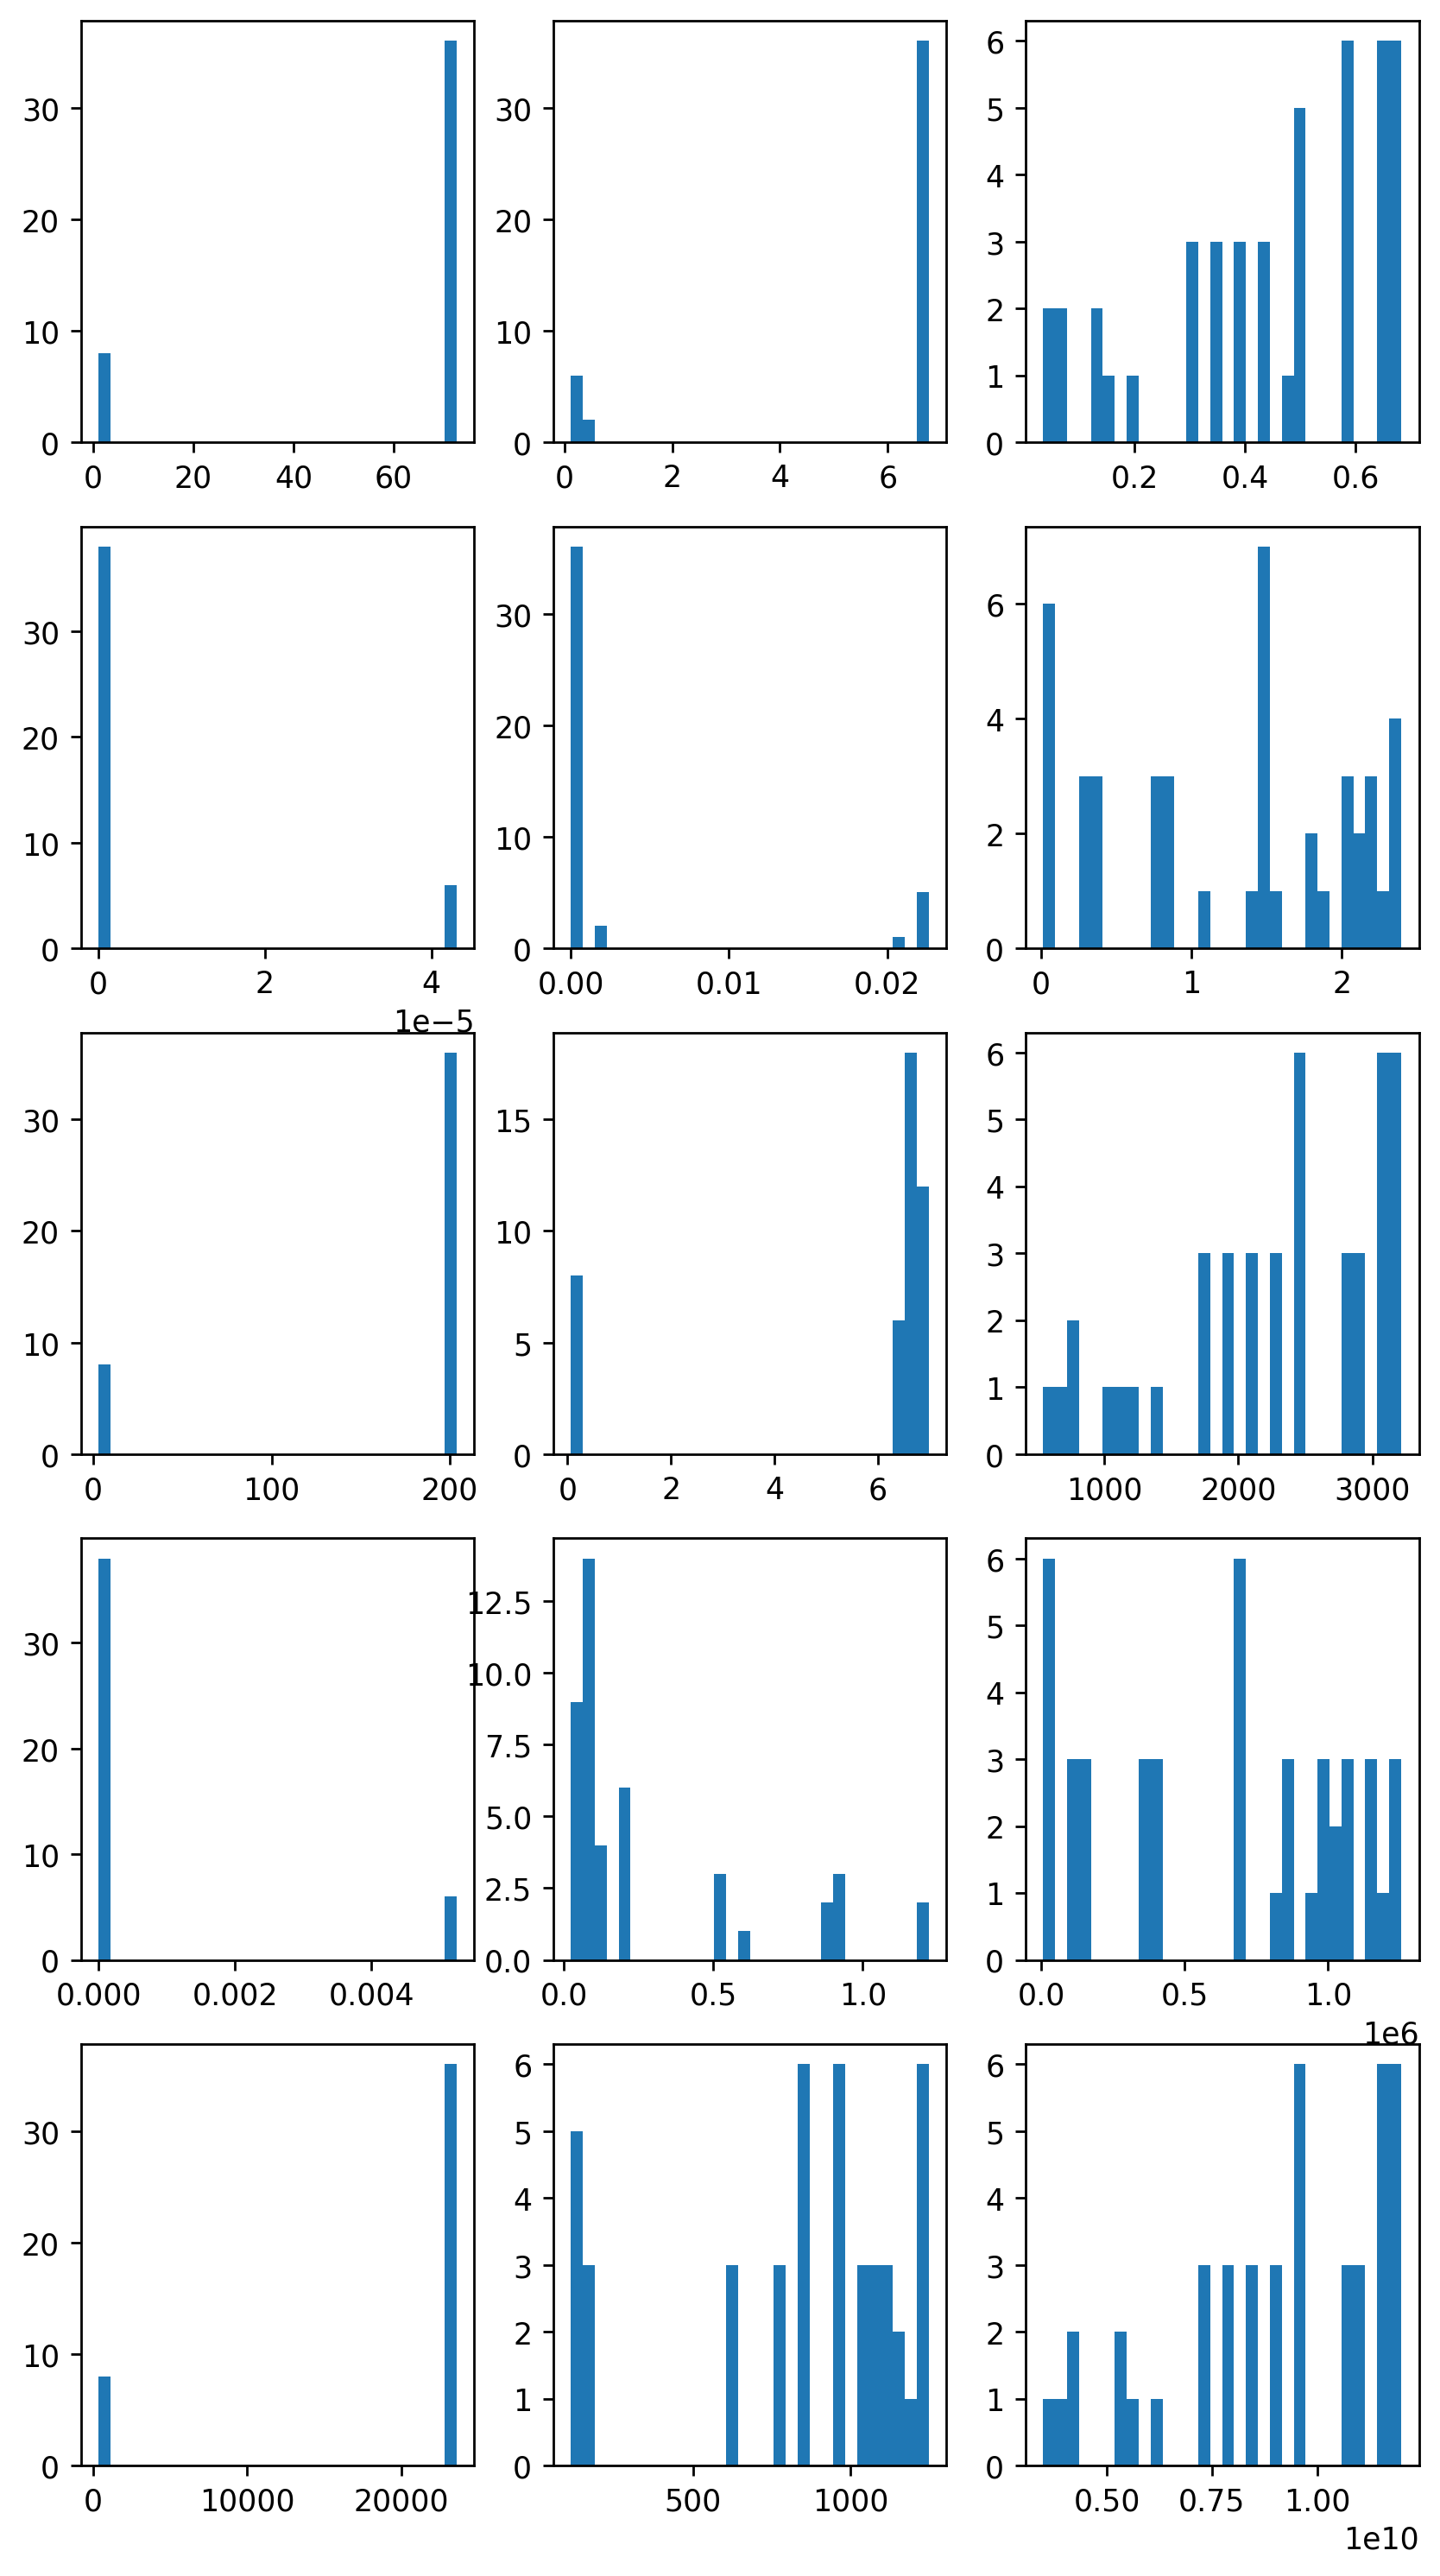

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

idxs = np.linspace(0,43*15,44,dtype=int)
print(idxs)

fig, axs = plt.subplots(5,3,figsize=(8,15),dpi=250)
count = 0
for i in range(5):
    for j in range(3):
        axs[i,j].hist(fps[idxs+count,2],bins=30)
        count += 1

[  0  15  30  45  60  75  90 105 120 135 150 165 180 195 210 225 240 255
 270 285 300 315 330 345 360 375 390 405 420 435 450 465 480 495 510 525
 540 555 570 585 600 615 630 645]


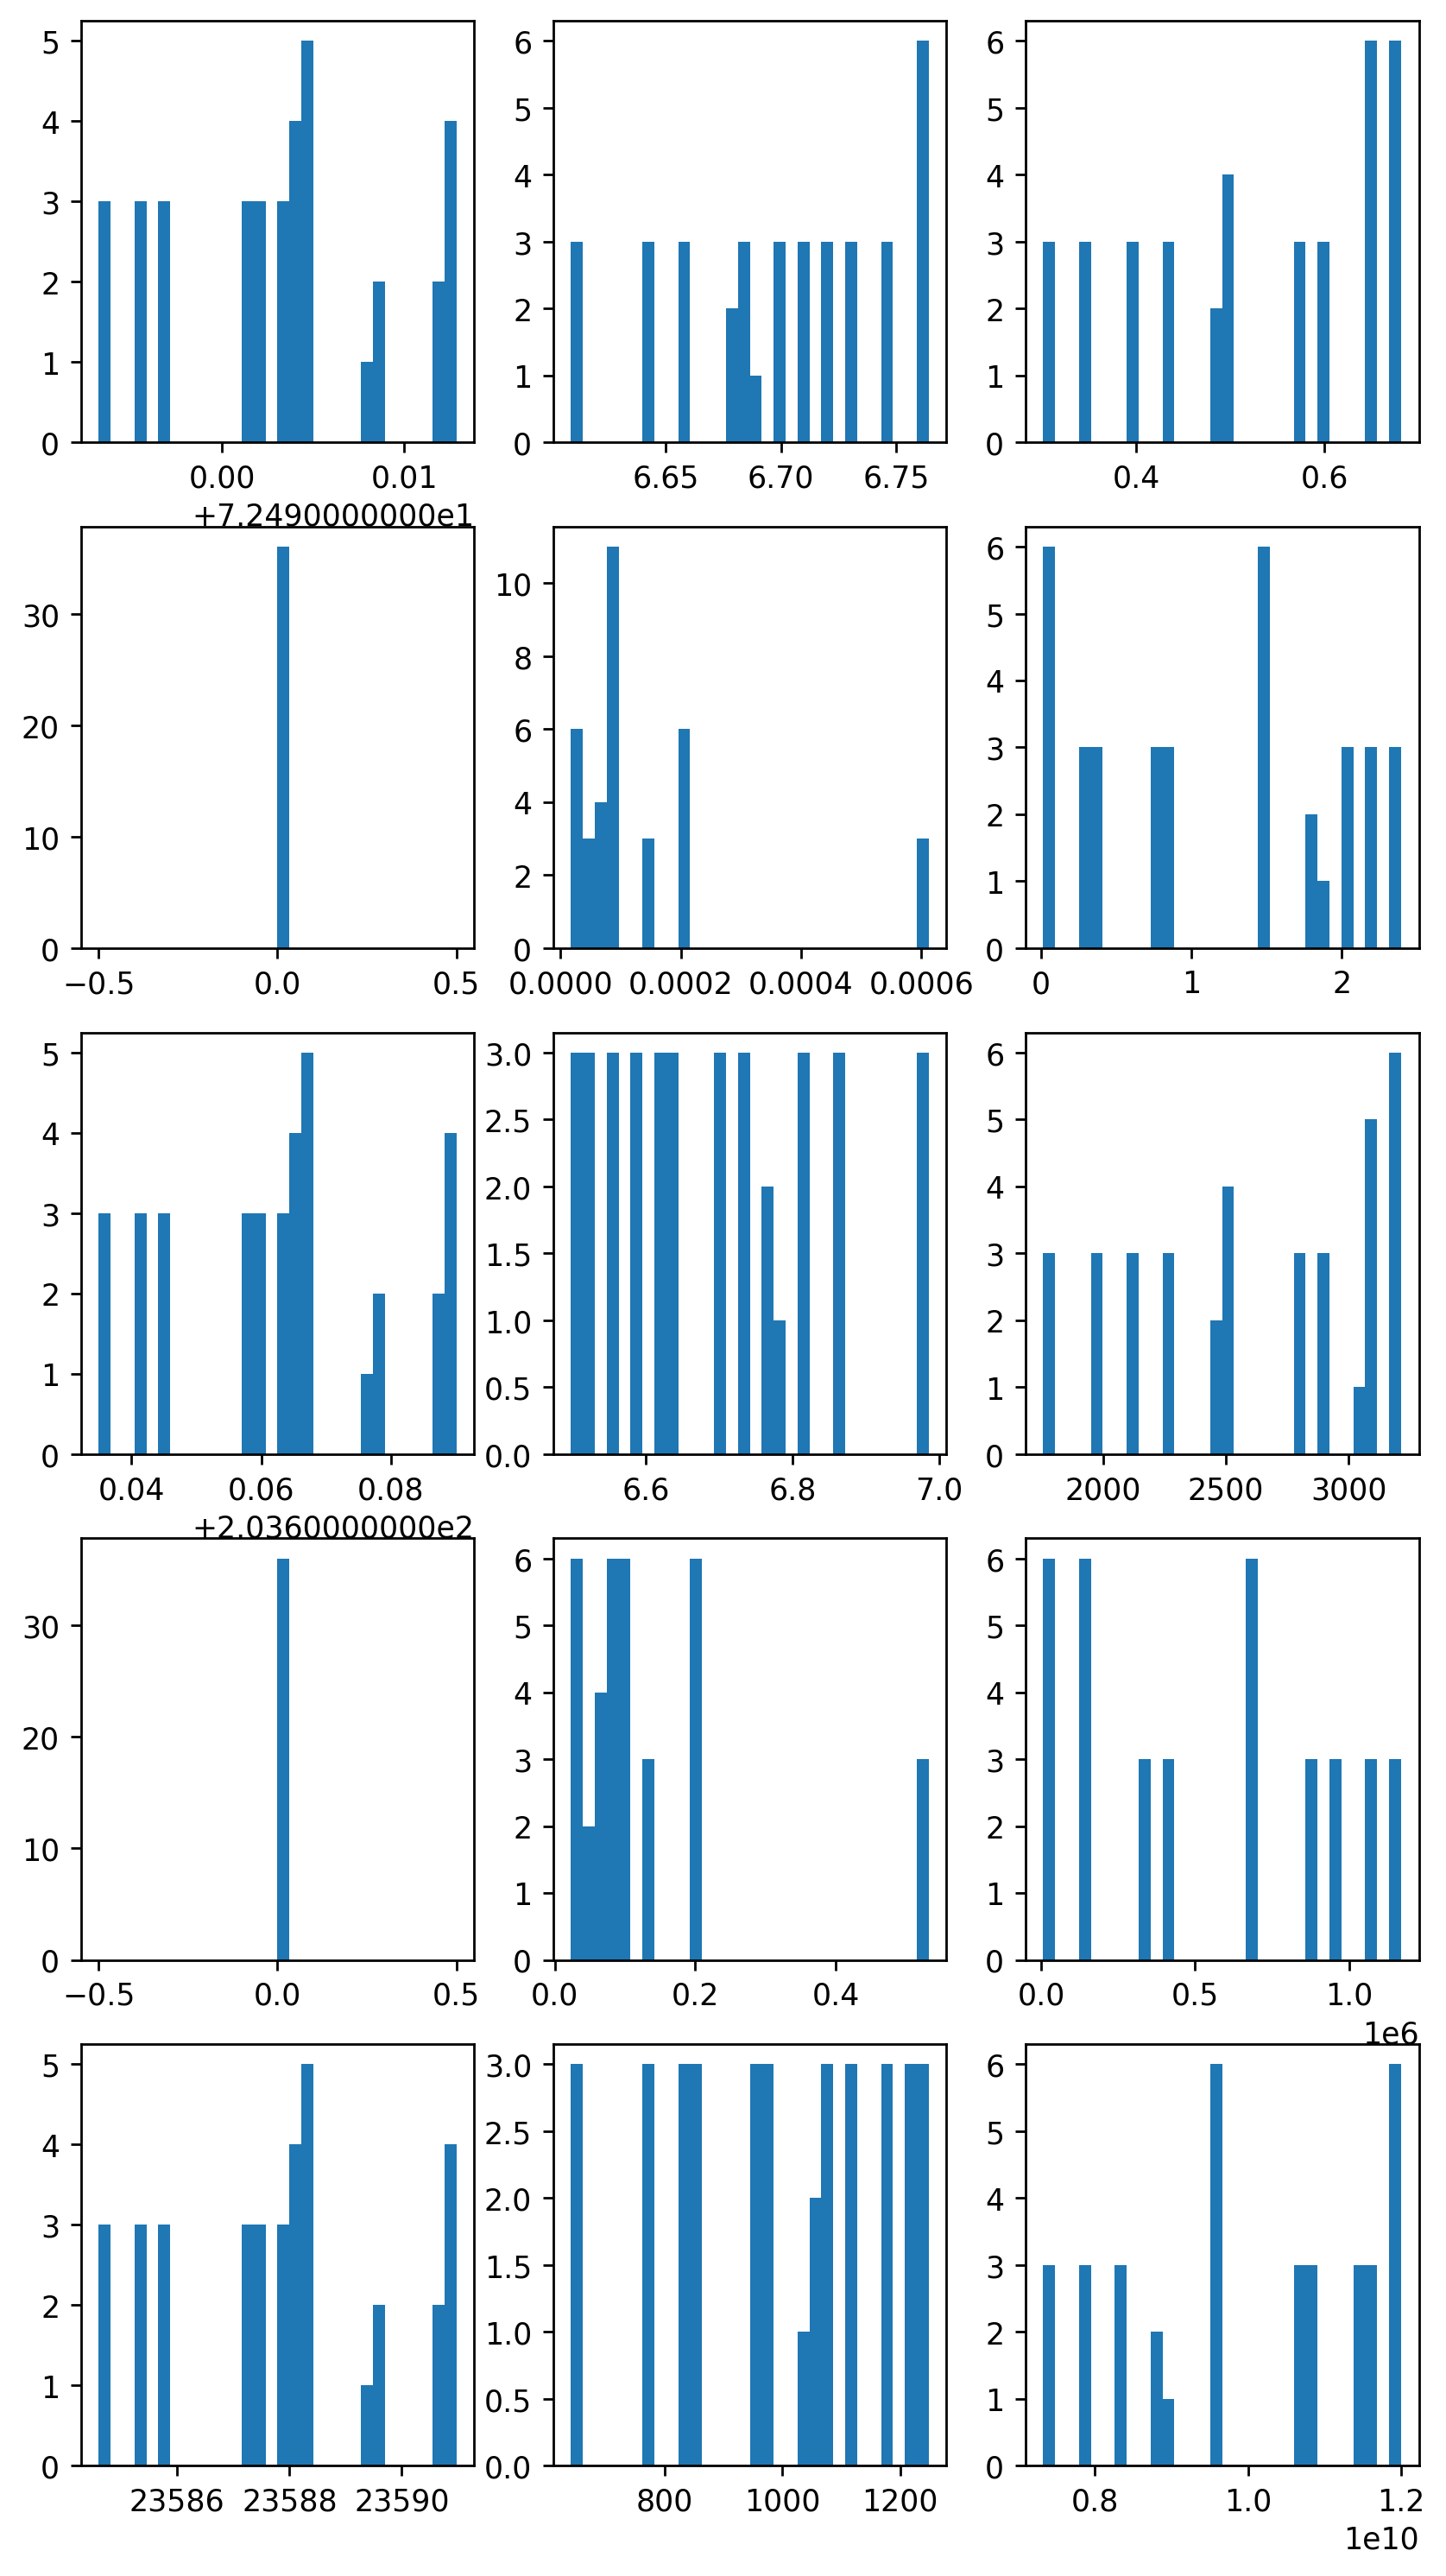

In [39]:
idxs = np.linspace(0,43*15,44,dtype=int)
print(idxs)
gold, carbon, hydrogen = fps[:15*36,:], fps[36*15:38*15,:], fps[38*15:,:]
gold_idx, carbon_idx, hydrogen_idx = np.linspace(0,35*15,36,dtype=int),np.linspace(0,1*15,2,dtype=int),np.linspace(0,5*15,6,dtype=int)

fig, axs = plt.subplots(5,3,figsize=(8,15),dpi=250)
count = 0
for i in range(5):
    for j in range(3):
        axs[i,j].hist(gold[gold_idx+count,2],bins=30)
        count += 1

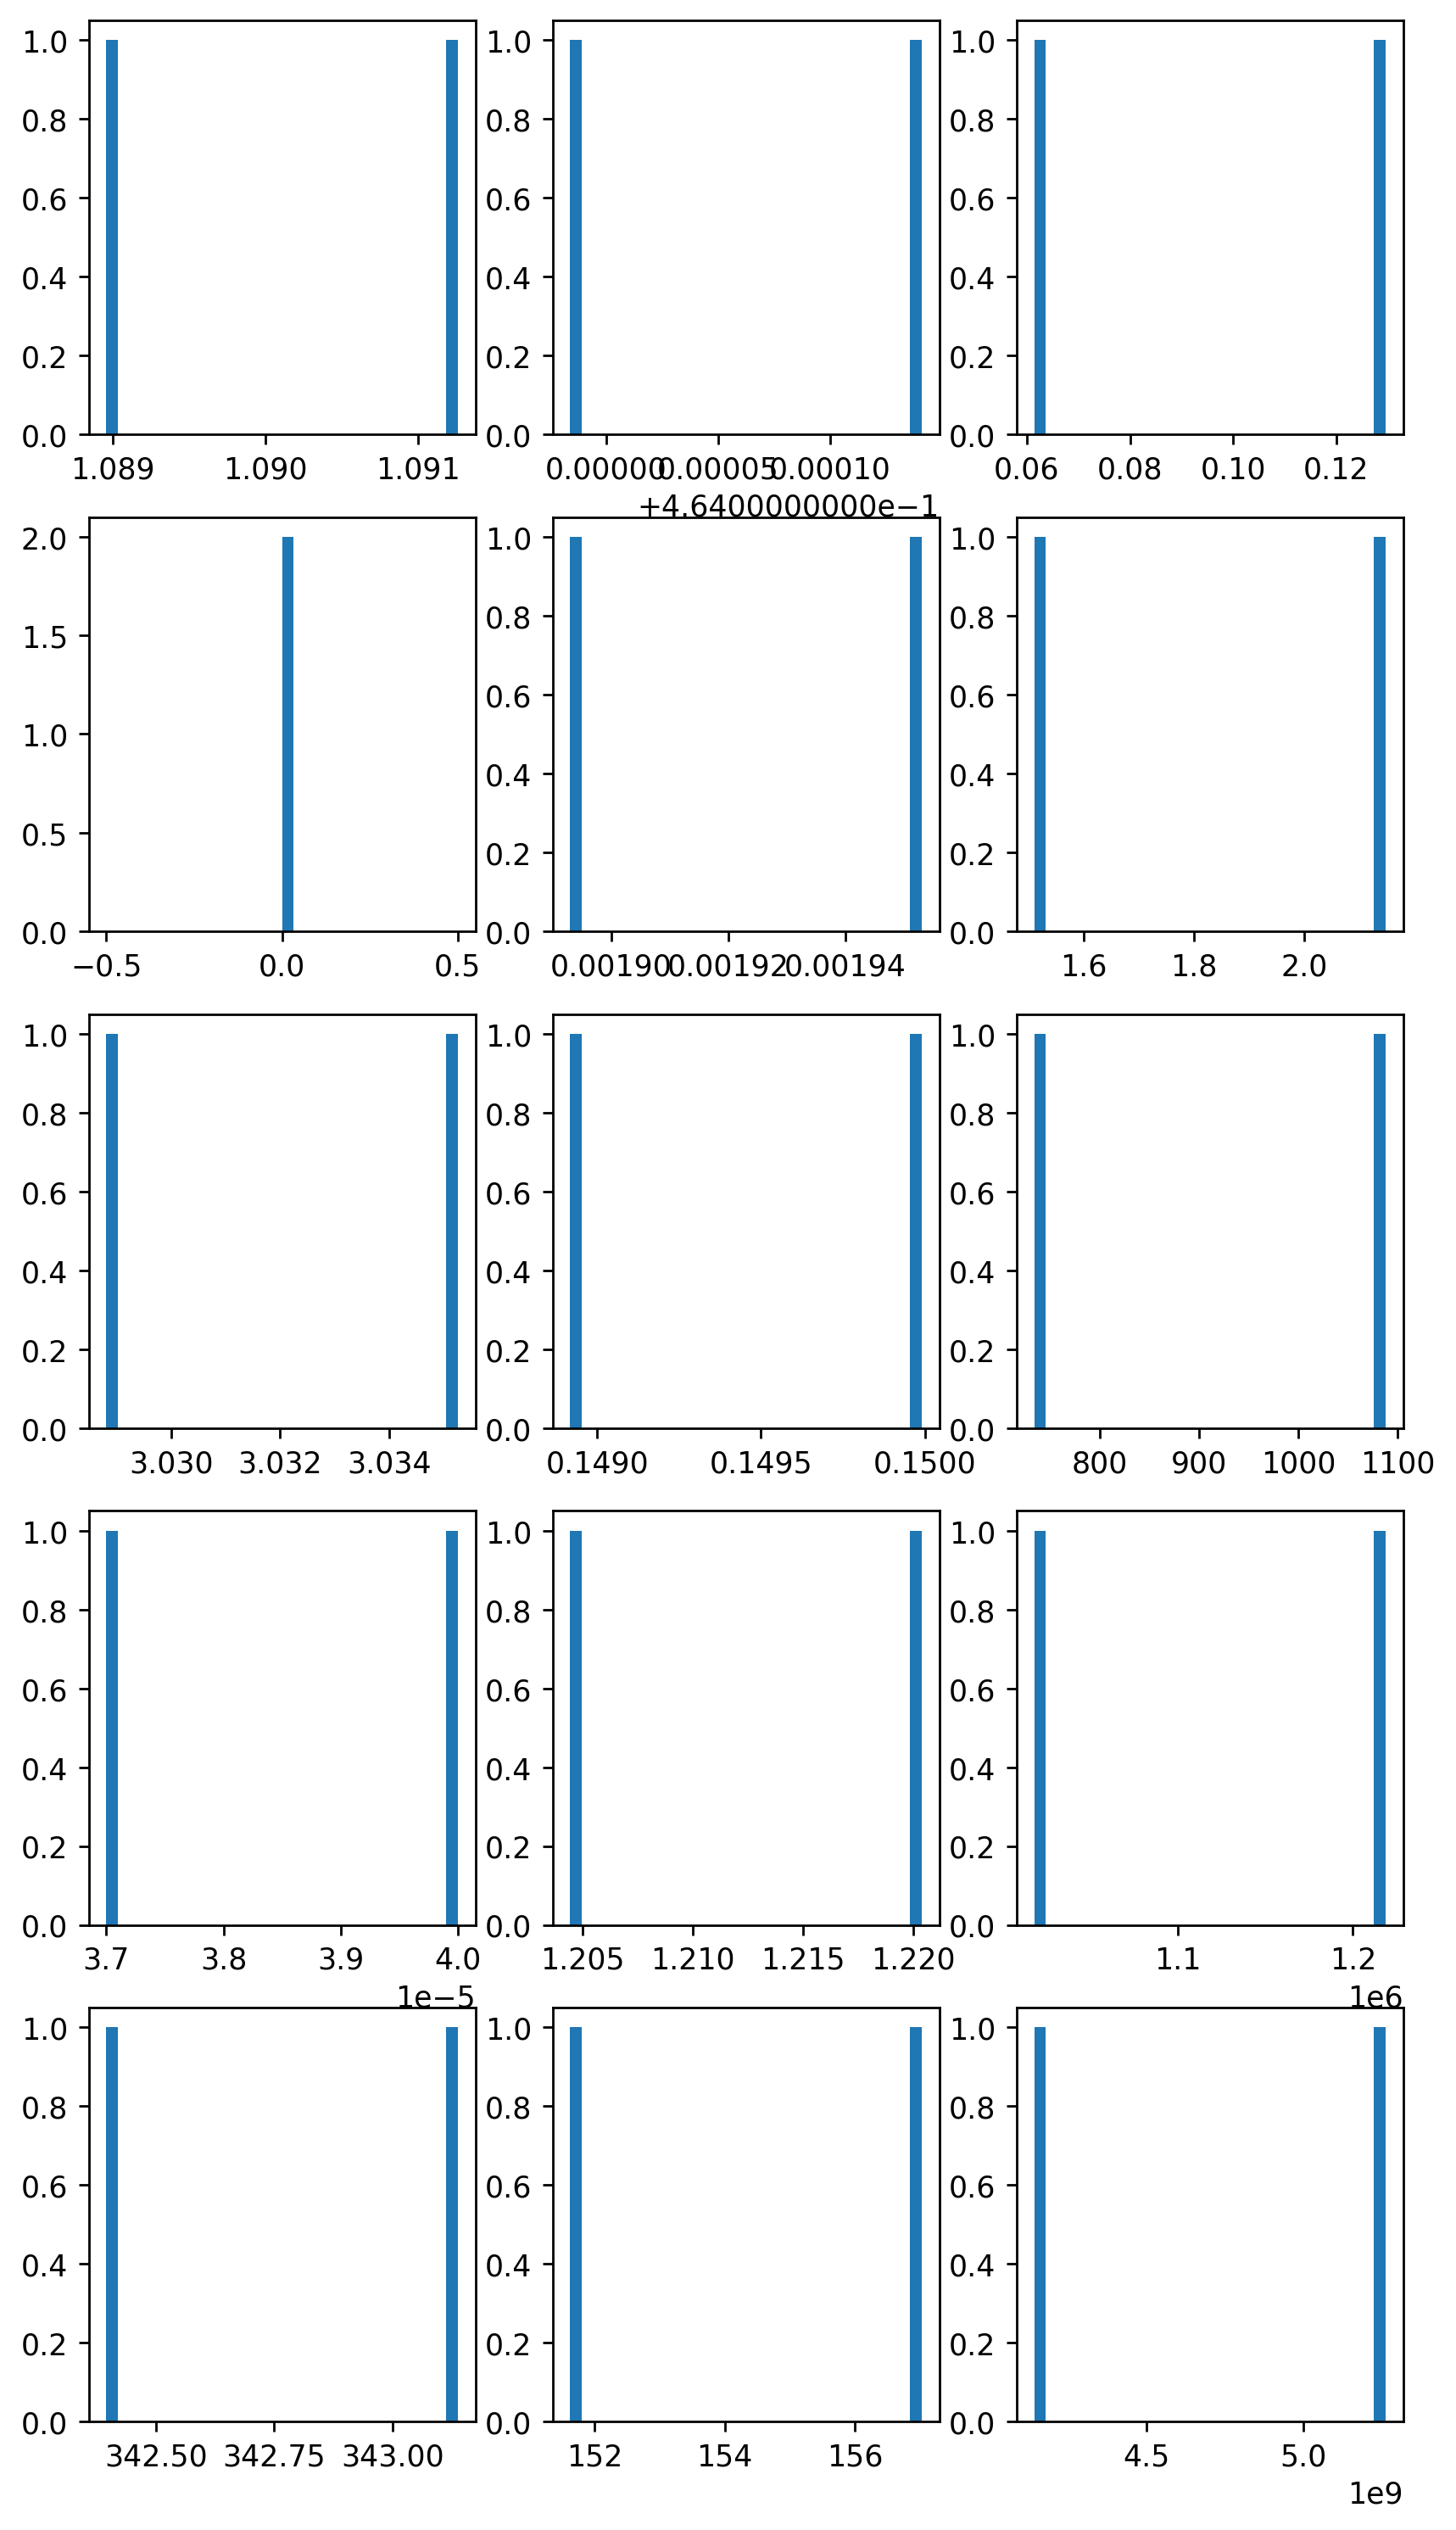

In [40]:
fig, axs = plt.subplots(5,3,figsize=(8,15),dpi=250)
count = 0
for i in range(5):
    for j in range(3):
        axs[i,j].hist(carbon[carbon_idx+count,2],bins=30)
        count += 1

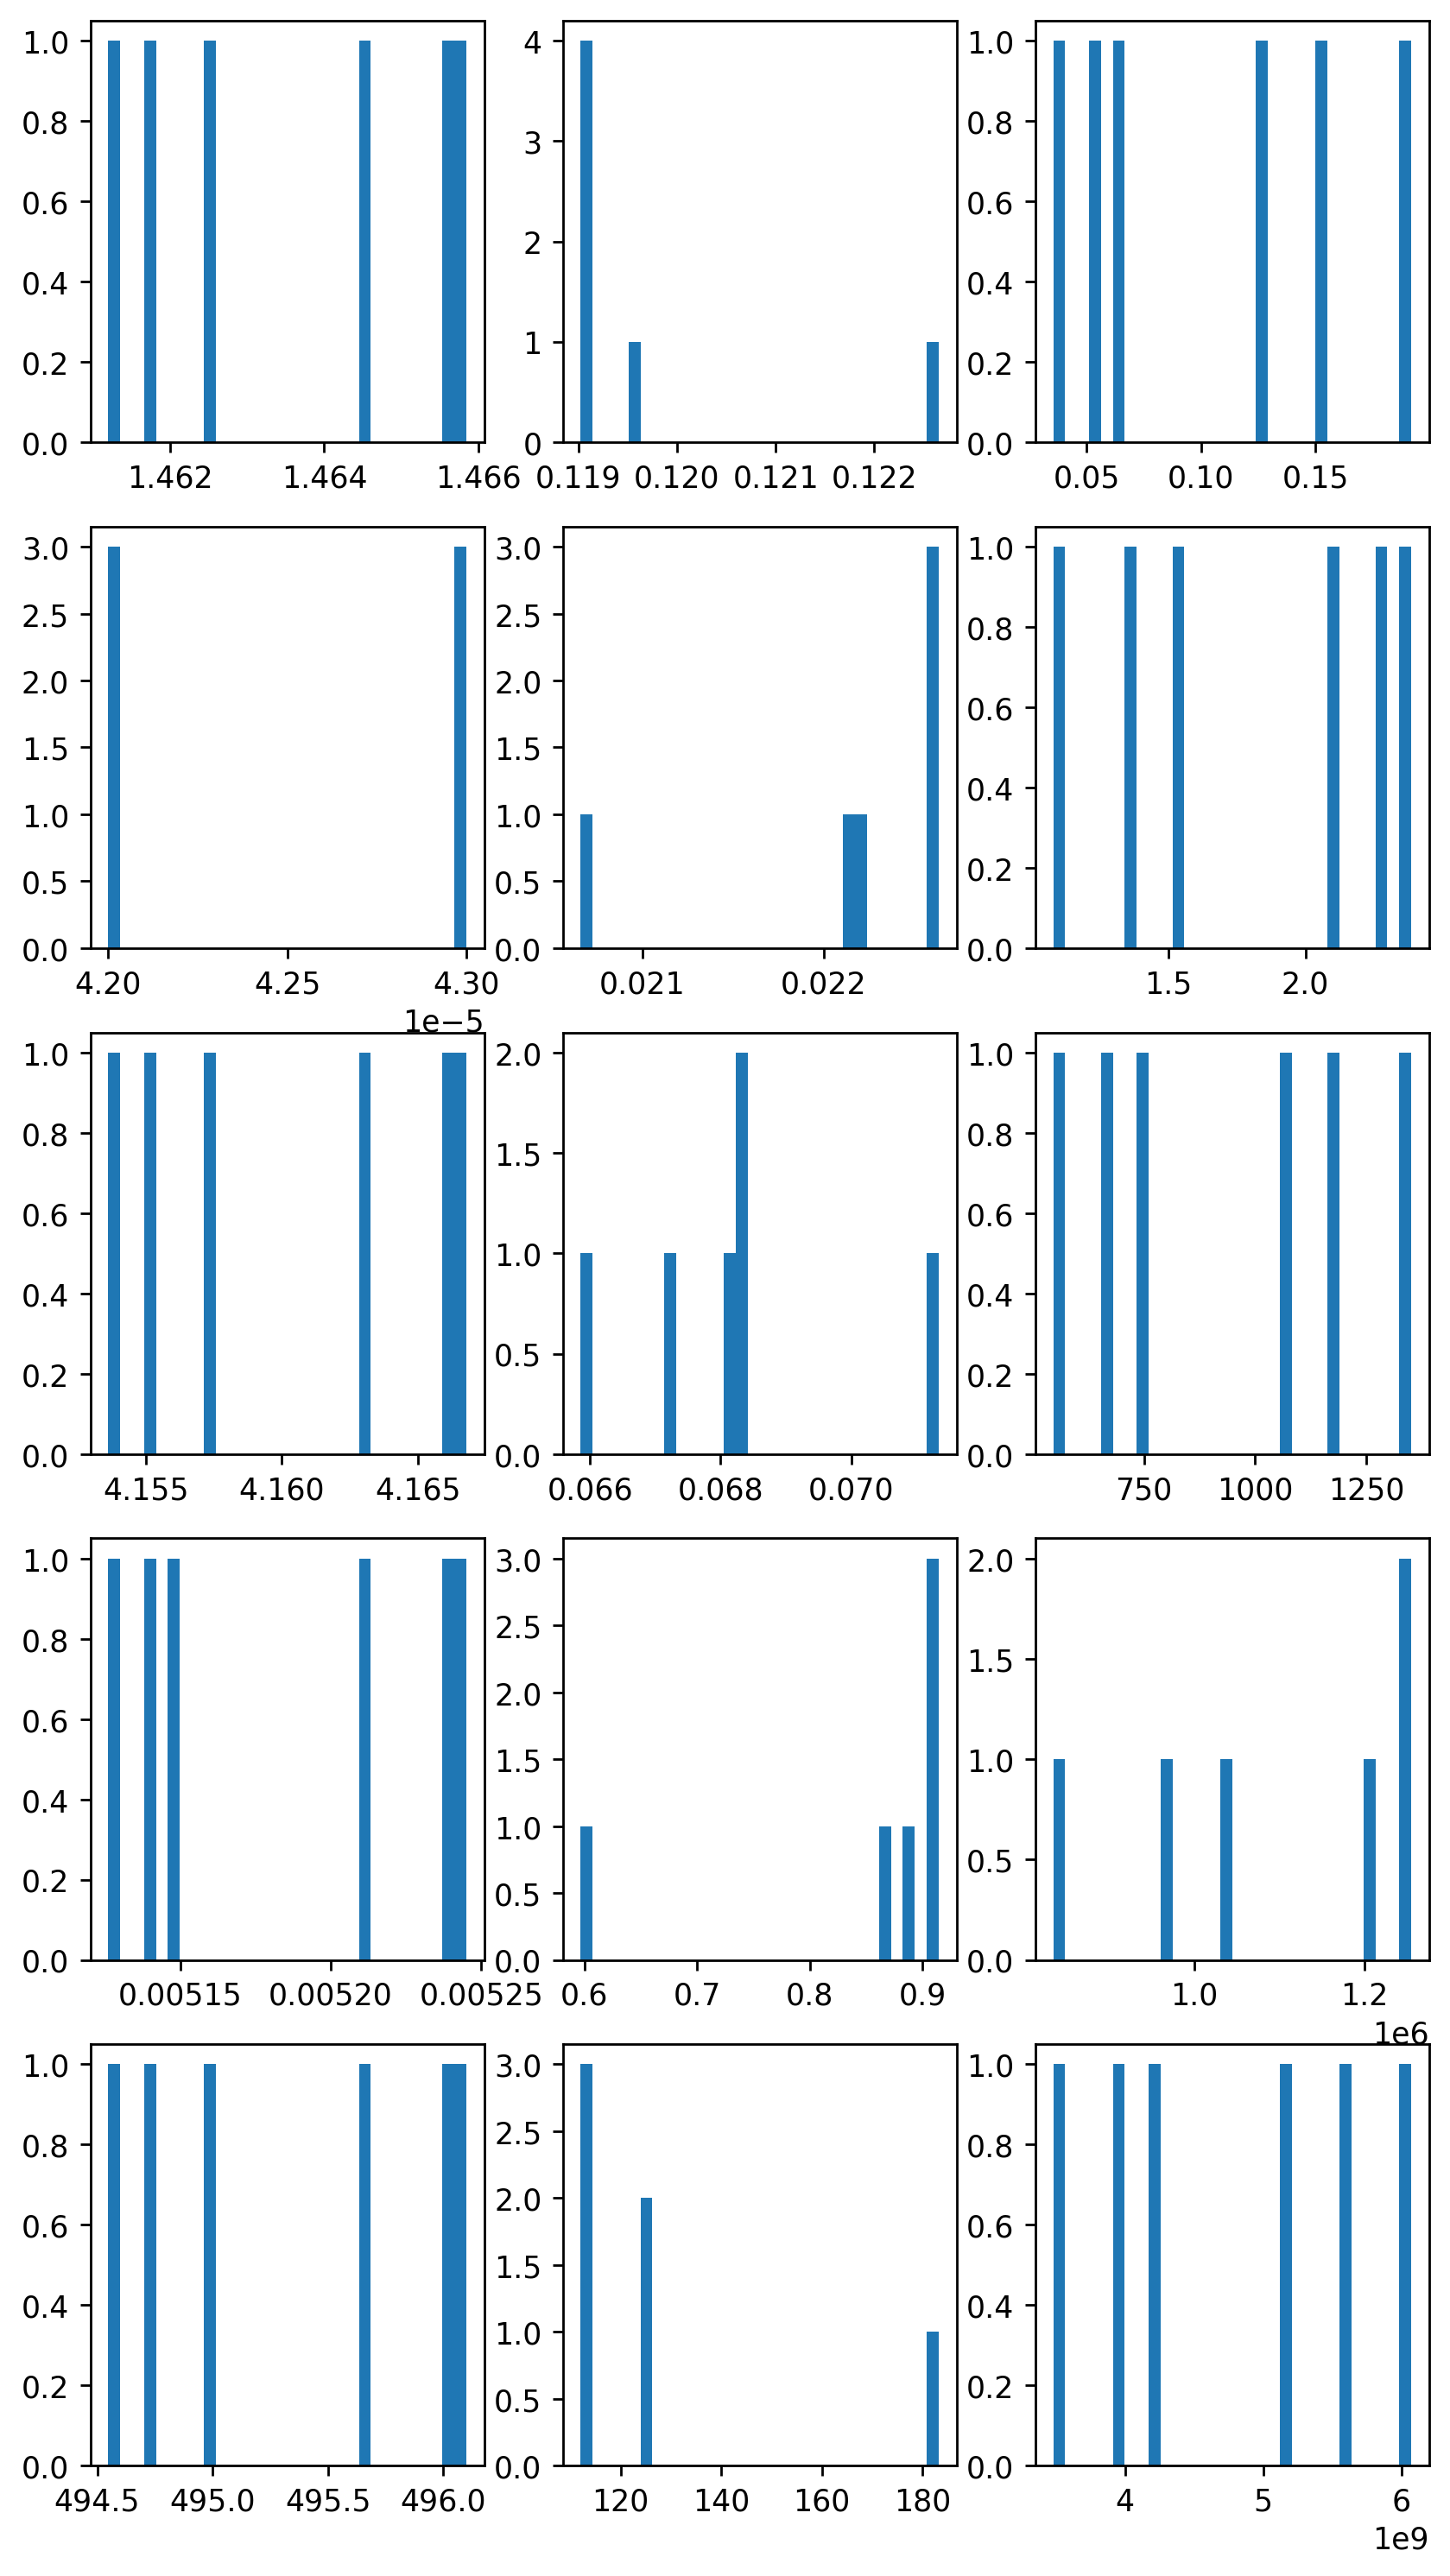

In [41]:
fig, axs = plt.subplots(5,3,figsize=(8,15),dpi=250)
count = 0
for i in range(5):
    for j in range(3):
        axs[i,j].hist(hydrogen[hydrogen_idx+count,2],bins=30)
        count += 1

In [1]:
import os
import h5py as hpy
import numpy as np
%matplotlib inline

home_dir = '/home/lucas/githubRepos/MCSH_C_Implementation/GMP/modular_c_gmp/'
os.chdir(home_dir)
fps = np.genfromtxt('./scaled_desc.txt',delimiter=',')
print(fps[0:15,:])

[[ 0.        0.        0.471454]
 [ 0.        1.        0.4638  ]
 [ 0.        2.       -0.481982]
 [ 0.        3.       -0.398394]
 [ 0.        4.       -0.346169]
 [ 0.        5.        1.150916]
 [ 0.        6.        0.471453]
 [ 0.        7.        0.502348]
 [ 0.        8.       -0.445723]
 [ 0.        9.       -0.398403]
 [ 0.       10.        0.740022]
 [ 0.       11.        0.984862]
 [ 0.       12.        0.471453]
 [ 0.       13.        0.064658]
 [ 0.       14.       -0.443936]]


[  0  15  30  45  60  75  90 105 120 135 150 165 180 195 210 225 240 255
 270 285 300 315 330 345 360 375 390 405 420 435 450 465 480 495 510 525
 540 555 570 585 600 615 630 645]


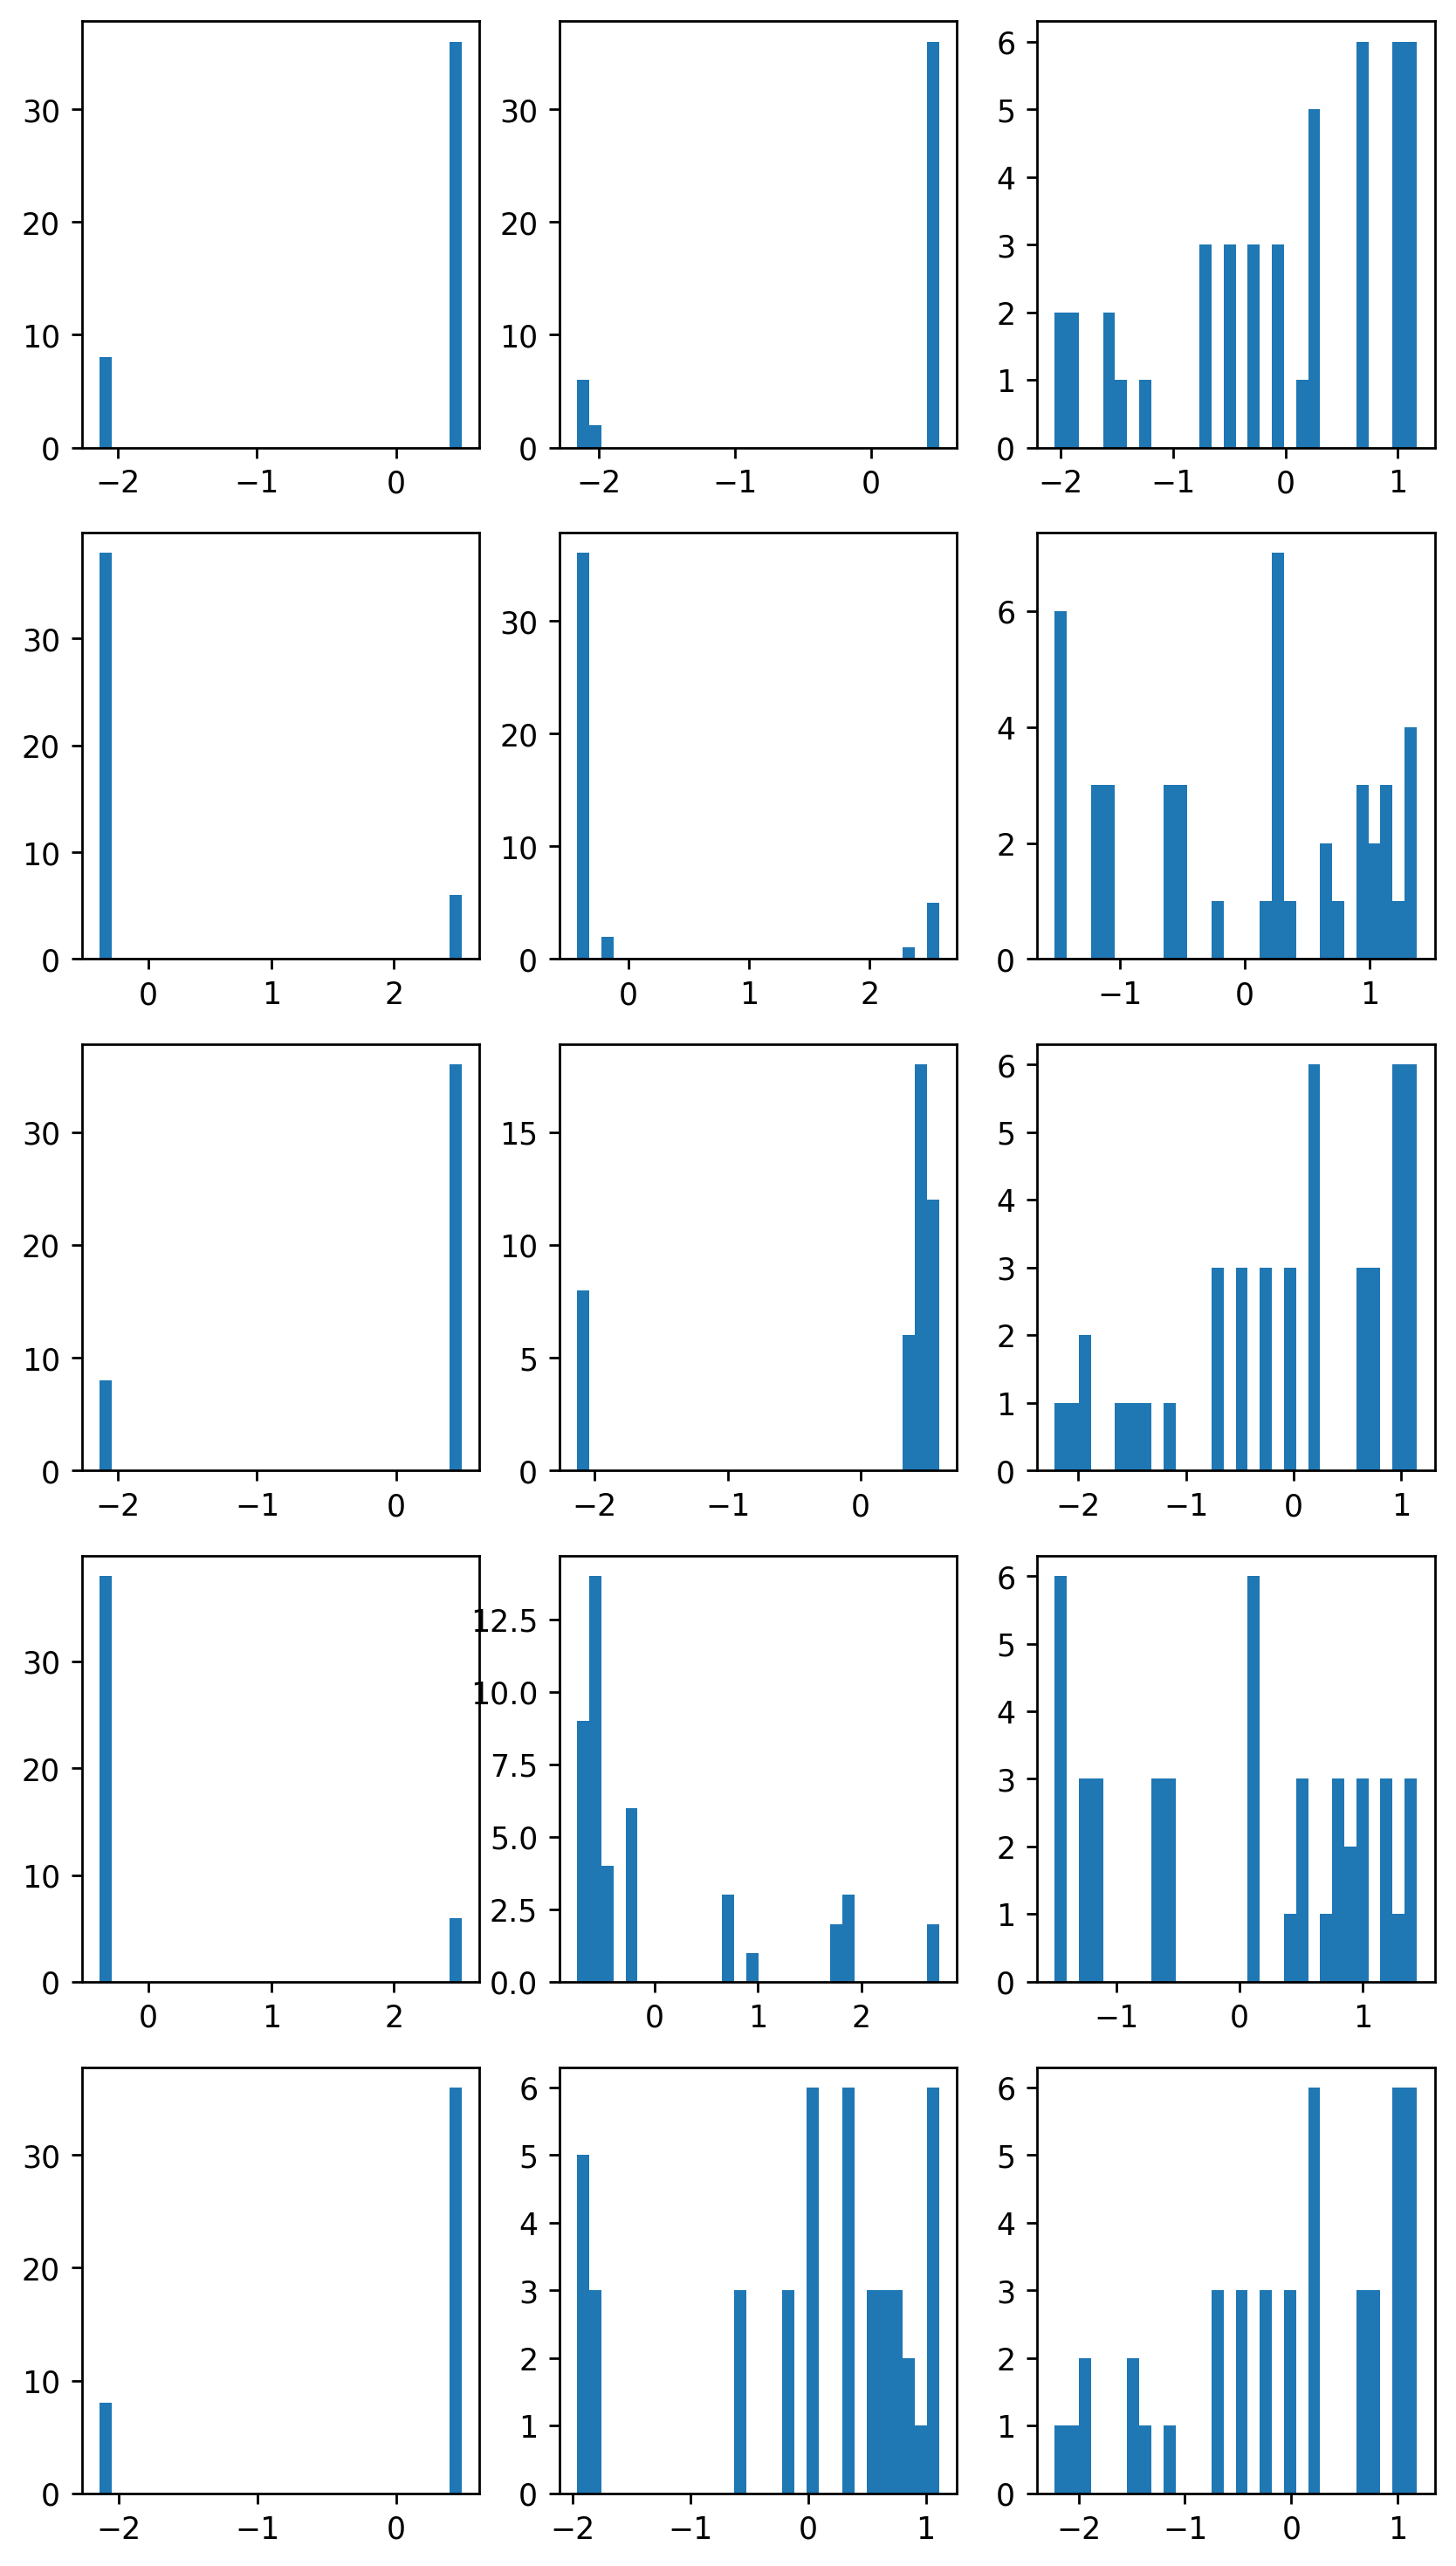

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

idxs = np.linspace(0,43*15,44,dtype=int)
print(idxs)

fig, axs = plt.subplots(5,3,figsize=(8,15),dpi=250)
count = 0
for i in range(5):
    for j in range(3):
        axs[i,j].hist(fps[idxs+count,2],bins=30)
        count += 1

(array([ 41.,  16.,   3.,   3.,  17.,   2.,  14.,   0.,   3.,  30.,  60.,
         88.,  16.,  11.,  25.,  26., 175.,  29.,  10.,  30.,  28.,   7.,
          1.,   1.,   4.,   0.,   0.,   1.,  17.,   2.]),
 array([-2.222986, -2.057176, -1.891366, -1.725556, -1.559746, -1.393936,
        -1.228126, -1.062316, -0.896506, -0.730696, -0.564886, -0.399076,
        -0.233266, -0.067456,  0.098354,  0.264164,  0.429974,  0.595784,
         0.761594,  0.927404,  1.093214,  1.259024,  1.424834,  1.590644,
         1.756454,  1.922264,  2.088074,  2.253884,  2.419694,  2.585504,
         2.751314]),
 <BarContainer object of 30 artists>)

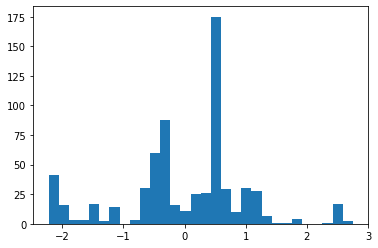

In [5]:
fig, ax = plt.subplots()
ax.hist(fps[:,2],bins=30)

In [1]:
import numpy as np

fps_deriv = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/modular_c_gmp/derivs.txt',delimiter=',')
print(fps_deriv.shape)

(660, 48)


# Fingerprint calculation for Hua

In [2]:
from amptorch.descriptor.GMPOrderNorm import GMPOrderNorm
from amptorch.preprocessing import (
    AtomsToData,
    FeatureScaler,
    TargetScaler
)
import pickle
import sys
from json import load
from ase.io import read
import os
from ase.calculators.singlepoint import SinglePointCalculator
import torch
import numpy as np

#Implement ability to use established scaling for test set - load feature scaler from normalizer.pt
def process(a2d,images,forcetraining,scaling,testset=False):
    data_list = a2d.convert_all(images)
    if testset:
        normalizers = torch.load('./normalizers.pt')
        feature_scaler = normalizers['feature']
        target_scaler = normalizers['target']
        data_list = feature_scaler.norm(data_list)
        data_list = target_scaler.norm(data_list)
    else:
        feature_scaler = FeatureScaler(data_list,forcetraining,scaling)
        target_scaler = TargetScaler(data_list,forcetraining)
        data_list = feature_scaler.norm(data_list)
        data_list = target_scaler.norm(data_list)

        normalizers = {'target': target_scaler,'feature':feature_scaler}
        torch.save(normalizers,'normalizers.pt')

    return data_list

sigmas = sigmas = np.logspace(-1,0.6,3).round(2)

MCSHs_dict = {
0: { "orders": [0], "sigmas": sigmas,},
1: { "orders": [0,1], "sigmas": sigmas,},
2: { "orders": [0,1,2], "sigmas": sigmas,},
3: { "orders": [0,1,2,3], "sigmas": sigmas,},
4: { "orders": [0,1,2,3,4], "sigmas": sigmas,},
5: { "orders": [0,1,2,3,4,5], "sigmas": sigmas,},
6: { "orders": [0,1,2,3,4,5,6], "sigmas": sigmas,},
7: { "orders": [0,1,2,3,4,5,6,7], "sigmas": sigmas,},
8: { "orders": [0,1,2,3,4,5,6,7,8], "sigmas": sigmas,},
9: { "orders": [0,1,2,3,4,5,6,7,8,9], "sigmas": sigmas,},
}
#The atom_gaussians should be modified by where you save your own Gaussians, if you do not have those Gaussian potentials, please check /storage/hive/project/chbe-medford/medford-share/shared/cchang373/valence_gaussians
MCSHs = MCSHs_dict[4]

GMP = { "MCSHs": MCSHs,
        "atom_gaussians": {
            "C": "/home/lucas/local_data/pseudo/C_pseudodensity_4.g",
            "O": "/home/lucas/local_data/pseudo/O_pseudodensity_4.g",
            "H": "/home/lucas/local_data/pseudo/H_pseudodensity_2.g",
            "Pt": "/home/lucas/local_data/pseudo/Pt_pseudodensity_6.g",
            "Au": "/home/lucas/local_data/pseudo/Au_pseudodensity_6.g",
            "Rh": "/home/lucas/local_data/pseudo/Rh_pseudodensity_4.g",
            "Pd": "/home/lucas/local_data/pseudo/Pd_pseudodensity_4.g",
            "Ag": "/home/lucas/local_data/pseudo/Ag_pseudodensity_4.g",
        },
        "cutoff": 18,
        "solid_harmonics":False
    }

fp_params = GMP
forcetraining = False

#only need this if atoms.get_potential_energy wouldn't work - need to attach energy
#Probably depends on data set - assume I need to for ccy data - could be eliminated with preprocessing step

dataset_name = 'Rh_fn_re_c_15.json'


traj_train, e_train, CHO_count_train, traj_test, e_test, CHO_count_test = load(open('/home/lucas/local_data/ggusmao/'+dataset_name))#should use your own path here

#folder_prefix = 'test_gmpon'
store_folder = '/home/lucas/githubRepos/MCSH_C_Implementation'
if not os.path.exists(store_folder):
    os.mkdir(store_folder)
os.chdir(store_folder)
#train and test images
images_train, images_test = [], []
elements = ['C','O','H','Pt','Au','Rh','Pd','Ag']

for traj,e in zip(traj_train, e_train):
    fn = read('/home/lucas/local_data/ggusmao/DFT/'+traj)
    force = fn.get_forces()
    calc = SinglePointCalculator(fn, energy=e, forces=force)
    fn.set_calculator(calc)
    
    images_train.append(fn)

print('load train!')

scaling = {'type':'normalize','range':(-1,1),'elementwise':False}

descriptor = GMPOrderNorm(MCSHs=fp_params,elements=elements)

a2d = AtomsToData(
    descriptor=descriptor,
    r_energy=True,
    r_forces=forcetraining,
    save_fps=True,
    fprimes=forcetraining,
    cores=1
)
testset=False
train_list = process(a2d,images_train,forcetraining,scaling,testset=testset)

save_obj = True
if save_obj:
    if not testset:
        with open('{}_scaled_desc'.format(folder_prefix),'wb') as fp:
            pickle.dump(train_list,fp)
    else:
        with open('{}_scaled_desc_test'.format(folder_prefix),'wb') as fp:
            pickle.dump(train_list,fp)

load train!


converting ASE atoms collection to Data objects:   0%|          | 0/13782 [00:00<?, ? systems/s]

Scaling Feature data (normalize):   0%|          | 0/13782 [00:00<?, ? scalings/s]

Scaling Target data:   0%|          | 0/13782 [00:00<?, ? scalings/s]

NameError: name 'folder_prefix' is not defined

### Get and save energies in same hash as .h5 files

In [1]:
from ase.io import read
from json import load
import os
from ase.calculators.singlepoint import SinglePointCalculator
import numpy as np
import hashlib

def get_hash(image):

    string = ""
    string += str(image.pbc)
    try:
        flattened_cell = image.cell.array.flatten()
    except AttributeError:  # older ASE
        flattened_cell = image.cell.flatten()
    for number in flattened_cell:
        string += "%.15f" % number
    for number in image.get_atomic_numbers():
        string += "%3d" % number
    for number in image.get_positions(wrap=True).flatten():
        string += "%.15f" % number

    md5 = hashlib.md5(string.encode("utf-8"))
    hash = md5.hexdigest()

    return hash

dataset_name = 'Rh_fn_re_c_15.json'


traj_train, e_train, CHO_count_train, traj_test, e_test, CHO_count_test = load(open('/home/lucas/local_data/ggusmao/'+dataset_name))#should use your own path here

#folder_prefix = 'test_gmpon'
store_folder = '/home/lucas/githubRepos/MCSH_C_Implementation/energies/'
if not os.path.exists(store_folder):
    os.mkdir(store_folder)
os.chdir(store_folder)
#train and test images
images_train, images_test = [], []
elements = ['C','O','H','Pt','Au','Rh','Pd','Ag']

for traj,e in zip(traj_train, e_train):
    fn = read('/home/lucas/local_data/ggusmao/DFT/'+traj)
    _hash = get_hash(fn)
    with open('./{}.txt'.format(_hash),'w') as fp:
        print(e,file=fp)

In [156]:
from amptorch.descriptor.GMPOrderNorm import GMPOrderNorm
from amptorch.preprocessing import (
    AtomsToData,
    FeatureScaler,
    TargetScaler
)
import pickle
import sys
from json import load
from ase.io import read
import os
from ase.calculators.singlepoint import SinglePointCalculator
import torch
import numpy as np

#Implement ability to use established scaling for test set - load feature scaler from normalizer.pt
def process(a2d,images,forcetraining,scaling,testset=False):
    data_list = a2d.convert_all(images)
    if testset:
        normalizers = torch.load('./normalizers.pt')
        feature_scaler = normalizers['feature']
        target_scaler = normalizers['target']
        data_list = feature_scaler.norm(data_list)
        data_list = target_scaler.norm(data_list)
    else:
        feature_scaler = FeatureScaler(data_list,forcetraining,scaling)
        target_scaler = TargetScaler(data_list,forcetraining)
        data_list = feature_scaler.norm(data_list)
        data_list = target_scaler.norm(data_list)

        normalizers = {'target': target_scaler,'feature':feature_scaler}
        torch.save(normalizers,'normalizers.pt')

    return data_list
os.chdir('/home/lucas/githubRepos/MCSH_C_Implementation')
sigmas = sigmas = np.logspace(-1,0.6,3).round(2)

MCSHs_dict = {
0: { "orders": [0], "sigmas": sigmas,},
1: { "orders": [0,1], "sigmas": sigmas,},
2: { "orders": [0,1,2], "sigmas": sigmas,},
3: { "orders": [0,1,2,3], "sigmas": sigmas,},
4: { "orders": [0,1,2,3,4], "sigmas": sigmas,},
5: { "orders": [0,1,2,3,4,5], "sigmas": sigmas,},
6: { "orders": [0,1,2,3,4,5,6], "sigmas": sigmas,},
7: { "orders": [0,1,2,3,4,5,6,7], "sigmas": sigmas,},
8: { "orders": [0,1,2,3,4,5,6,7,8], "sigmas": sigmas,},
9: { "orders": [0,1,2,3,4,5,6,7,8,9], "sigmas": sigmas,},
}
#The atom_gaussians should be modified by where you save your own Gaussians, if you do not have those Gaussian potentials, please check /storage/hive/project/chbe-medford/medford-share/shared/cchang373/valence_gaussians
MCSHs = MCSHs_dict[4]

GMP = { "MCSHs": MCSHs,
        "atom_gaussians": {
            "Al": "/home/lucas/local_data/pseudo/Al_pseudodensity_4.g",
        },
        "cutoff": 18,
        "solid_harmonics":True
    }

fp_params = GMP
forcetraining = True

#only need this if atoms.get_potential_energy wouldn't work - need to attach energy
#Probably depends on data set - assume I need to for ccy data - could be eliminated with preprocessing step

traj_train, e_train = ['Al_scell.traj'],[0.]
folder_prefix = 'GMP/unp_solid'
store_folder = './'+folder_prefix
if not os.path.exists(store_folder):
    os.mkdir(store_folder)
os.chdir(store_folder)
#train and test images
images_train, images_test = [], []
elements = ['Al']

for traj,e in zip(traj_train, e_train):
    fn = read('/home/lucas/githubRepos/MCSH_C_Implementation/'+traj)
    shift = -0.000
    fn.positions[0,0] = fn.positions[0,0]+shift
    #print(fn.get_positions())
    force = 0.
    calc = SinglePointCalculator(fn, energy=e, forces=force)
    fn.set_calculator(calc)
    
    images_train.append(fn)

print('load train!')

scaling = {'type':'standardize','elementwise':False}

descriptor = GMPOrderNorm(MCSHs=fp_params,elements=elements)

a2d = AtomsToData(
    descriptor=descriptor,
    r_energy=True,
    r_forces=forcetraining,
    save_fps=True,
    fprimes=forcetraining,
    cores=1
)
testset=False
train_list = process(a2d,images_train,forcetraining,scaling,testset=testset)

save_obj = True
if save_obj:
    if not testset:
        with open('{}_scaled_desc'.format('Al'),'wb') as fp:
            pickle.dump(train_list,fp)
    else:
        with open('{}_scaled_desc_test'.format('Al'),'wb') as fp:
            pickle.dump(train_list,fp)

load train!


In [14]:
import pickle
with open('/home/lucas/githubRepos/MCSH_C_Implementation/{}_scaled_desc'.format('Rh'),'rb') as fp:
            test = pickle.load(fp)
for idx,img in enumerate(test):
    fp = img.fingerprint.detach().numpy()
    if idx < 1:
        store = fp
    else:
        store = np.vstack((store,fp))

np.mean(store,axis=0)

array([ 0.7410844 ,  0.68191504,  0.3634957 , -0.9694294 , -0.9386966 ,
       -0.04905759,  0.7409926 ,  0.60113424,  0.45030063, -0.9694084 ,
       -0.9478577 , -0.08630233,  0.74070925, -0.19954681,  0.4544707 ],
      dtype=float32)

In [42]:
_dense = train_list[0].fprimes.to_dense()
train_list[0]
_dense = train_list[0].fingerprint
_dense.shape
np_dense = _dense.detach().numpy()
np.savetxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/altAmp_Al.txt',np_dense,delimiter=',')

In [43]:
print(_dense)

tensor([[ 6.1035e-05, -2.3842e-07, -8.9407e-08,  ...,  0.0000e+00,
          6.1035e-05, -1.0240e+03],
        [ 6.1035e-05, -2.3842e-07, -8.9407e-08,  ...,  0.0000e+00,
          6.1035e-05, -1.0240e+03],
        [ 6.1035e-05, -2.3842e-07, -8.9407e-08,  ...,  0.0000e+00,
          6.1035e-05, -1.0240e+03],
        ...,
        [ 6.1035e-05, -2.3842e-07, -8.9407e-08,  ...,  0.0000e+00,
          6.1035e-05, -1.0240e+03],
        [ 6.1035e-05, -2.3842e-07, -8.9407e-08,  ...,  0.0000e+00,
          6.1035e-05, -1.0240e+03],
        [ 6.1035e-05, -2.3842e-07, -8.9407e-08,  ...,  0.0000e+00,
          6.1035e-05, -1.0240e+03]])


In [11]:
count = 0
for fprint in train_list:
    if count < 1:
        holder = fprint.fingerprint.detach().numpy()
        count += 1
    else:
        tmp = fprint.fingerprint.detach().numpy()
        holder = np.vstack((holder,tmp))


TypeError: _savetxt_dispatcher() got an unexpected keyword argument 'delimieter'

In [12]:
np.savetxt('./Rh_fprints.csv',holder,delimiter=',')

In [5]:
normalizers = torch.load('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/normalizers.pt')
feature_scaler = normalizers['feature']
fp_idx = train_list[0].fprimes._indices()[0]
print(fp_idx,'\n')
fp_idx_to_scale = fp_idx % train_list[0].fingerprint.shape[1]
print(fp_idx_to_scale,'\n')
scale = feature_scaler.scale["scale"][fp_idx_to_scale]
print(scale)
offset = feature_scaler.scale["offset"][fp_idx_to_scale]
print(offset)

tensor([   0,    0,    0,  ..., 1619, 1619, 1619]) 

tensor([ 0,  0,  0,  ..., 14, 14, 14]) 

tensor([1., 1., 1.,  ..., 1., 1., 1.])
tensor([3.2601e+02, 3.2601e+02, 3.2601e+02,  ..., 1.2948e+10, 1.2948e+10,
        1.2948e+10])


In [6]:
print(torch.mean(train_list[0].fingerprint, dim=0))
print(torch.std(train_list[0].fingerprint, dim=0, unbiased=False))

tensor([ 6.1035e-05, -2.3842e-07, -8.9407e-08, -2.3822e-44, -1.3820e-35,
         9.1303e-34, -6.1035e-05,  0.0000e+00,  4.8828e-04, -4.0385e-42,
        -5.8434e-32,  5.7443e-27,  0.0000e+00,  6.1035e-05, -1.0240e+03])
tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8323e-37, 2.3291e-28, 1.2105e-25,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2629e-35, 1.3398e-24, 4.4956e-19,
        0.0000e+00, 0.0000e+00, 0.0000e+00])


### Scaling
Derivatives are scaled, but no offset. For stdev, just devide by variance/scaling factor.

# Get Descriptors
- Gets descriptors for aluminum only system

In [7]:
os.chdir('/home/lucas/githubRepos/MCSH_C_Implementation')

In [157]:
import os
import h5py as hpy
import numpy as np
%matplotlib inline
naked=np.zeros((1,15))
#path = '/home/lucas/githubRepos/MCSH_C_Implementation/GMP/processed/descriptors/GMPOrderNorm/64a9acbbcc41f61d4cf501fbe23eadd1'
pert = ['unp_solid']
paths = ['/home/lucas/githubRepos/MCSH_C_Implementation/GMP/{}/processed/descriptors/GMPOrderNorm/'.format(x) for x in pert]
for path,pos in zip(paths,pert):
    descriptor_folder = os.listdir(path)
    print(descriptor_folder[0])
    os.chdir(path+descriptor_folder[0])
    descriptor_files = os.listdir()
    print(descriptor_files)
    try:
        f = hpy.File(descriptor_files[-1],'r')
    except OSError:
        f = hpy.File(descriptor_files[0],'r')
    natoms,nmcsh = f['0']['Al']['fps'].shape
    test = np.zeros((natoms*nmcsh,natoms*3))
    cols_list = f['0']['Al']['fp_primes_col'][:]
    rows_list = f['0']['Al']['fp_primes_row'][:]
    vals = f['0']['Al']['fp_primes_val'][:]
    count = 0
    for row,col in zip(rows_list,cols_list):
        test[row,col] = vals[count]
        count += 1
    fps = f['0']['Al']['fps'][:,:]
    np.savetxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/{}_derivs.csv'.format(pos),test[:,::3],delimiter=',')
    np.savetxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/{}_fps.csv'.format(pos),fps.ravel(),delimiter=',')

fef2d0d078abb26c243adc351c2a46e8
['descriptor_log.txt', '400c1f34e7d22aff3e390963d380ab33.h5']


In [36]:
print(f['0']['Al']['fps'].shape)
print(f['0']['Al']['fp_primes_col'])
print(f['0']['Al']['fp_primes_row'])
print(f['0']['Al']['fp_primes_val'][:])
print(cols_list)
print(rows_list)
x,y = f['0']['Al']['fps'].shape
print(x,y)

(2, 15)
<HDF5 dataset "fp_primes_col": shape (52,), type "<i4">
<HDF5 dataset "fp_primes_row": shape (52,), type "<i4">
[ 2.04394311e-02 -2.04394311e-02  1.17423769e-02 -1.17423769e-02
  3.06734927e-05 -3.06734927e-05  1.05009086e-05 -1.05009086e-05
  6.20808340e-05 -6.20808340e-05  5.77133142e-02 -5.77133142e-02
 -2.87719995e-02  2.87719995e-02 -2.76262014e-01  2.76262014e-01
  6.75958308e-03 -6.75958308e-03  4.36410347e+01 -4.36410347e+01
  6.76452660e+00 -6.76452660e+00  2.45745913e+01 -2.45745913e+01
  4.28231570e+05 -4.28231570e+05  2.04394311e-02 -2.04394311e-02
  1.17423769e-02 -1.17423769e-02  3.06734927e-05 -3.06734927e-05
  1.05009086e-05 -1.05009086e-05  6.20808340e-05 -6.20808340e-05
  5.77133142e-02 -5.77133142e-02 -2.87719995e-02  2.87719995e-02
 -2.76262014e-01  2.76262014e-01  6.75958308e-03 -6.75958308e-03
  4.36410347e+01 -4.36410347e+01  6.76452660e+00 -6.76452660e+00
  2.45745913e+01 -2.45745913e+01  4.28231570e+05 -4.28231570e+05]
[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0

# Compare descriptors from txt files

In [ ]:
compare = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/cpp_gmp/derivs.txt',delimiter=',')[:,1:]
print(compare)

In [ ]:
comp_result = np.isclose(test,compare,atol=1e-5)
print(comp_result[0,0])
np.savetxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/compare_bool.csv',comp_result,fmt="%5i",delimiter=',')

In [ ]:
residual = test - compare
print(residual[44,:])

In [ ]:
import os
import h5py as hpy
import numpy as np
%matplotlib inline

modular_calc = np.genfromtxt('./modular_c_gmp/derivs.txt',delimiter=',')
just_derivs = modular_calc[:,3:]
print(just_derivs.shape)
amptorch_derivs = np.genfromtxt('./amptorch_derivs_chaos.csv',delimiter=',')
print(amptorch_derivs.shape)

In [ ]:
for i in range(132):
    print('Mod/GMP: {}\t{}'.format(just_derivs[0,i],amptorch_derivs[0,i]))

In [1]:
import numpy as np
import os
import pandas as pd

In [67]:
path = '/home/lucas/githubRepos/MCSH_C_Implementation/GMP/'
#cpp_dms = np.sort(np.genfromtxt(path+'cpp_gmp/dms.txt',delimiter=','))
#mod_dms = np.sort(np.genfromtxt(path+'modular_c_gmp/dms.txt',delimiter=','))
cpp_dms = np.genfromtxt(path+'cpp_gmp/dms.txt',delimiter=',')
mod_dms = np.genfromtxt(path+'modular_c_gmp/dms.txt',delimiter=',')
#np.savetxt('./sorted_cpp.txt',cpp_dms,delimiter=',')
#np.savetxt('./sorted_mod.txt',mod_dms,delimiter=',')
_comp = np.isclose(cpp_dms,mod_dms,atol=1e-5)#.all(axis=1)
np.savetxt('./bools.txt',_comp,fmt="%i",delimiter=',')

In [68]:
_comp[:,1:].all()
#with open('./loc.txt','w') as f:
#    print(np.where(~_comp[:,1:]),file=f)

True

In [56]:
path = '/home/lucas/githubRepos/MCSH_C_Implementation/GMP/'
dtype = [('r0',float),('x0',float),('y0',float),('z0',float),('dxdx',float),('dxdy',float),('dxdz',float)]
#cpp_dms = pd.read_csv(path+'cpp_gmp/dms.txt',delimiter=',',names=['r0','x0','y0','z0','dxdx','dxdy','dxdz'])
#mod_dms = pd.read_csv(path+'modular_c_gmp/dms.txt',delimiter=',',names=['r0','x0','y0','z0','dxdx','dxdy','dxdz'])
#cpp_dms = pd.read_csv(path+'cpp_gmp/dms.txt',delimiter=',',names=['r0','x0','y0','z0','d1','d2','d3','d4','d5','d6','d7','d8','d9'])
#mod_dms = pd.read_csv(path+'modular_c_gmp/dms.txt',delimiter=',',names=['r0','x0','y0','z0','d1','d2','d3','d4','d5','d6','d7','d8','d9'])
cpp_dms = pd.read_csv(path+'cpp_gmp/dms.txt',delimiter=',',names=['d1','d2','d3','d4','d5','d6','d7','d8','d9'])
mod_dms = pd.read_csv(path+'modular_c_gmp/dms.txt',delimiter=',',names=['d1','d2','d3','d4','d5','d6','d7','d8','d9'])
#cpp_dms = pd.read_csv(path+'cpp_gmp/dms.txt',delimiter=',',names=['x0','y0','z0'])
#mod_dms = pd.read_csv(path+'modular_c_gmp/dms.txt',delimiter=',',names=['x0','y0','z0'])
#args1 = cpp_dms[:, 0].argsort()
#args2 = mod_dms[:, 0].argsort()
#sorted_cpp = cpp_dms[args1]
#sorted_mod = mod_dms[args2]
#sorted_cpp = cpp_dms.sort_values(by=['x0','y0','z0'],ignore_index=True).values
#sorted_mod = mod_dms.sort_values(by=['x0','y0','z0'],ignore_index=True).values
#sorted_cpp = cpp_dms.sort_values(by=['d1','d2','d3','d4','d5','d6','d7','d8','d9'],ignore_index=True).values
#sorted_mod = mod_dms.sort_values(by=['d1','d2','d3','d4','d5','d6','d7','d8','d9'],ignore_index=True).values

_comp = np.isclose(sorted_cpp,sorted_mod)#.all(axis=1)
np.savetxt('./bools.txt',_comp,fmt="%i",delimiter=',')


In [57]:
np.savetxt('./sorted_cpp.txt',sorted_cpp,delimiter=',')
np.savetxt('./sorted_mod.txt',sorted_mod,delimiter=',')

In [59]:
#print(np.where(~_comp))
#print(_comp)
_comp.all()

True

#### Consider
Sort by j to see what should be where
### Progress
`miu[0,1,2]` evaluate as expected, as do `deriv[0-8]`


## Conclusion
Calculations are identical when identical parameters passed. Parameters being passed is the issue. Issue is at `sum_dmiu_d(x,y,z)j` level. `sum_dmiu_d(x,y,z)j` are all calculated correctly, but not in the correct order. `type==1` calculated correctly. Looking at other types

# Final Conclusion
I am an idiot. Scrambled the assignment of `deriv[0-8] resulting in correct calculations in the wrong spots :{(

In [56]:
path = '/home/lucas/githubRepos/MCSH_C_Implementation/GMP/'

cpp_dms = np.genfromtxt(path+'cpp_gmp/dms.txt',delimiter=',')
mod_dms = np.genfromtxt(path+'modular_c_gmp/dms.txt',delimiter=',')
_comp = np.isclose(cpp_dms,mod_dms)#.all(axis=1)
print(_comp.all())

True


# Gen Al structures

## Gen Al supercell

In [ ]:
from ase.io import read
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
from ase.visualize import view
import numpy as np
from ase.spacegroup import crystal
from ase import Atoms, Atom
from ase.build import fcc211
import sys
import ase
import time
import os
from json import load
import csv
from scipy.optimize import fmin
from copy import deepcopy as copy
from ase.constraints import FixAtoms
import pandas as pd
import glob
from ase.build import add_adsorbate
#!pip install nglview #this needs to be install to visualize structures through jupyter notebook
#!jupyter-nbextension enable nglview --py --sys-prefix  # this might be needed
%matplotlib inline

# Update path as necessary
home_path = '/home/lucas/githubRepos/MCSH_C_Implementation/'
_crystal = crystal('Al',setting=1,basis=[[0.,0.,0.]],spacegroup=225,size=(3,3,3),cellpar=[4.05]*3+[90.]*3,pbc=[True]*3,symprec=1e-18)
fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(_crystal,rotation='10x,20y,1z')
_crystal.write(home_path+'Al_scell.traj')

In [ ]:
atom_pos = _crystal.positions
np.savetxt('./atom_pos.csv',atom_pos,delimiter=',')

In [ ]:
scale = _crystal.get_scaled_positions()
np.savetxt('./atom_scaled.csv',scale,delimiter=',')

## Gen smaller aluminum systems

<AxesSubplot:>

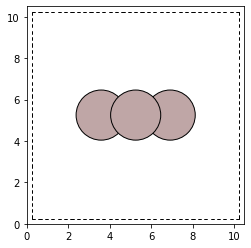

In [67]:
home_path = '/home/lucas/githubRepos/MCSH_C_Implementation/'
from ase import Atoms
L = 10
dummy = Atoms('Al3',
              positions = [[L/3,L/2,L/2],[2*L/3,L/2,L/2],[L/2,L/2,9.]],
              cell = [L,L,L],
              pbc=[1,1,1])
plot_atoms(dummy)

In [68]:
dummy.write(home_path+'GMP/tripleAl.traj')

In [7]:
home_path = '/home/lucas/githubRepos/MCSH_C_Implementation/'
dummy = read(home_path+'Al_scell.traj')
_array = dummy.get_scaled_positions()
x = []
with open(home_path+'positions.txt','w') as fp:
    for elem in range(108):
        x += ['{0:.15f}\t{1:.15f}\t{2:.15f}'.format(_array[elem,0],_array[elem,1],_array[elem,2])]
    print('\n'.join(x),file=fp)

In [89]:
dummy = read(home_path+'Al_scell.traj')
print(dummy.positions)
dummy.rattle(0.01)
print(dummy.positions)
dummy.write('Al_rattled.traj')

[[ 0.     0.     0.   ]
 [ 0.     2.025  2.025]
 [ 2.025  0.     2.025]
 [ 2.025  2.025  0.   ]
 [ 0.     0.     4.05 ]
 [ 0.     2.025  6.075]
 [ 2.025  0.     6.075]
 [ 2.025  2.025  4.05 ]
 [ 0.     0.     8.1  ]
 [ 0.     2.025 10.125]
 [ 2.025  0.    10.125]
 [ 2.025  2.025  8.1  ]
 [ 0.     4.05   0.   ]
 [ 0.     6.075  2.025]
 [ 2.025  4.05   2.025]
 [ 2.025  6.075  0.   ]
 [ 0.     4.05   4.05 ]
 [ 0.     6.075  6.075]
 [ 2.025  4.05   6.075]
 [ 2.025  6.075  4.05 ]
 [ 0.     4.05   8.1  ]
 [ 0.     6.075 10.125]
 [ 2.025  4.05  10.125]
 [ 2.025  6.075  8.1  ]
 [ 0.     8.1    0.   ]
 [ 0.    10.125  2.025]
 [ 2.025  8.1    2.025]
 [ 2.025 10.125  0.   ]
 [ 0.     8.1    4.05 ]
 [ 0.    10.125  6.075]
 [ 2.025  8.1    6.075]
 [ 2.025 10.125  4.05 ]
 [ 0.     8.1    8.1  ]
 [ 0.    10.125 10.125]
 [ 2.025  8.1   10.125]
 [ 2.025 10.125  8.1  ]
 [ 4.05   0.     0.   ]
 [ 4.05   2.025  2.025]
 [ 6.075  0.     2.025]
 [ 6.075  2.025  0.   ]
 [ 4.05   0.     4.05 ]
 [ 4.05   2.025 

In [90]:
os.getcwd()

'/home/lucas/githubRepos/MCSH_C_Implementation/GMP/double_neg/processed/descriptors/GMPOrderNorm/64a9acbbcc41f61d4cf501fbe23eadd1'

## Calc derivatives from txt and csv files

In [108]:
def centered_finite(pos,neg,h):
    return (pos-neg)/(2*h)
pos = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/double_pos_fps.csv',delimiter=',')
neg = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/double_neg_fps.csv',delimiter=',')
derivs_2 = centered_finite(pos,neg,0.0001)
aderivs_2 = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/double_derivs.csv',delimiter=',')[:,0]
for idx,deriv in enumerate(derivs_2):
    print(idx+1,' %.10E %.10E'%(deriv,aderivs_2[idx]))


1  2.0439431694E-02 2.0439431063E-02
2  1.1742381427E-02 1.1742376851E-02
3  3.0673493139E-05 3.0673492705E-05
4  2.9032352818E-10 0.0000000000E+00
5  1.0500909131E-05 1.0500908627E-05
6  6.2080844895E-05 6.2080834046E-05
7  5.7713315869E-02 5.7713314195E-02
8  -2.8772007488E-02 -2.8771999523E-02
9  -2.7626204385E-01 -2.7626201433E-01
10  3.5264501623E-08 0.0000000000E+00
11  6.7595833776E-03 6.7595830776E-03
12  4.3641035625E+01 4.3641034678E+01
13  6.7645267700E+00 6.7645265998E+00
14  2.4574592647E+01 2.4574591330E+01
15  4.2823143019E+05 4.2823157028E+05
16  2.0439066759E-02 2.0439431062E-02
17  1.1742317336E-02 1.1742376851E-02
18  3.0673494952E-05 3.0673492705E-05
19  2.9032352818E-10 0.0000000000E+00
20  1.0500909131E-05 1.0500908627E-05
21  6.2080842315E-05 6.2080834046E-05
22  5.7697051261E-02 5.7713314195E-02
23  -2.8771929466E-02 -2.8771999523E-02
24  -2.7626204499E-01 -2.7626201433E-01
25  3.5264501623E-08 0.0000000000E+00
26  6.7595833772E-03 6.7595830776E-03
27  4.3641034

In [110]:
pos = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/pos_fps.csv',delimiter=',')
neg = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/neg_fps.csv',delimiter=',')
derivs_all = centered_finite(pos,neg,0.0001)
aderivs_all = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/unp_derivs.csv',delimiter=',')[:,0]
for idx,deriv in enumerate(derivs_all):
    print(idx+1,' %.10E %.10E'%(deriv,aderivs_all[idx]))

1  -2.3965185392E-06 0.0000000000E+00
2  -1.5998313785E-08 0.0000000000E+00
3  8.1268325403E-10 0.0000000000E+00
4  -3.0588673246E-22 0.0000000000E+00
5  -7.5637886350E-16 0.0000000000E+00
6  5.9110876075E-15 0.0000000000E+00
7  5.1556980907E-06 0.0000000000E+00
8  -6.6640026830E-08 0.0000000000E+00
9  6.0913407651E-06 0.0000000000E+00
10  -3.5990989940E-20 0.0000000000E+00
11  -1.1543996888E-12 0.0000000000E+00
12  7.4322994842E-10 0.0000000000E+00
13  1.2726377463E-03 0.0000000000E+00
14  -1.8621904019E-06 0.0000000000E+00
15  -3.6945343018E+01 -3.2147188904E-04
16  0.0000000000E+00 0.0000000000E+00
17  0.0000000000E+00 0.0000000000E+00
18  -1.4627188349E-10 0.0000000000E+00
19  -8.6412759560E-24 0.0000000000E+00
20  1.2604085540E-17 0.0000000000E+00
21  -1.7921914276E-15 0.0000000000E+00
22  0.0000000000E+00 0.0000000000E+00
23  0.0000000000E+00 0.0000000000E+00
24  1.5916157281E-08 0.0000000000E+00
25  -1.1858798077E-21 0.0000000000E+00
26  1.7424355005E-14 0.0000000000E+00
27  1.8

In [149]:
pos = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/rattle_pos_fps.csv',delimiter=',')
neg = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/rattle_neg_fps.csv',delimiter=',')
derivs_rat = centered_finite(pos,neg,0.0001)
aderivs_rat = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/rattle_derivs.csv',delimiter=',')[:,0]
for idx,deriv in enumerate(derivs):
    print(idx+1,' %.10E %.10E'%(deriv,aderivs_rat[idx]))

1  -1.9026629161E-04 -2.0243996884E-04
2  4.0486125563E-06 0.0000000000E+00
3  5.2995785538E-06 0.0000000000E+00
4  -7.4194014826E-11 0.0000000000E+00
5  -5.4676612717E-08 0.0000000000E+00
6  8.8552437846E-07 0.0000000000E+00
7  -5.8209195686E-04 -5.7232137965E-04
8  -5.2415773943E-05 -5.2395164366E-05
9  -7.9864744293E-02 -7.9865422196E-02
10  -9.0302850478E-09 0.0000000000E+00
11  3.1220354399E-04 3.1220361862E-04
12  3.2519938007E-01 3.2519804127E-01
13  -6.7679284257E-02 -6.7274730705E-02
14  -3.6506452261E-03 -3.6487022108E-03
15  -6.0880241394E+04 -6.0888151728E+04
16  5.4651025039E-04 5.3239009211E-04
17  1.6116340928E-04 1.6112151941E-04
18  6.4520339071E-06 0.0000000000E+00
19  2.8871698298E-10 0.0000000000E+00
20  3.0235428381E-06 0.0000000000E+00
21  2.3673359178E-06 0.0000000000E+00
22  1.4709223706E-03 1.5042268749E-03
23  -3.5447818902E-04 -3.5444676218E-04
24  -3.1957295050E-02 -3.1956907910E-02
25  3.5115614386E-08 0.0000000000E+00
26  1.6437244037E-03 1.6437244169E-03


In [84]:
pos = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/clean_gmp_sparc/test_pos.txt',delimiter=',')[:,:3]
neg = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/clean_gmp_sparc/test_neg.txt',delimiter=',')[:,:3]
derivs = centered_finite(pos[:,0],neg[:,0],0.0001)
for idx,deriv in enumerate(derivs):
    print(idx+1,' %.10E'%deriv)

1  0.0000000000E+00
2  0.0000000000E+00
3  0.0000000000E+00
4  0.0000000000E+00
5  0.0000000000E+00
6  0.0000000000E+00
7  0.0000000000E+00
8  0.0000000000E+00
9  -1.5006662579E-06
10  0.0000000000E+00
11  0.0000000000E+00
12  0.0000000000E+00
13  0.0000000000E+00
14  -9.9987573776E-07
15  -5.4264068604E+00
16  0.0000000000E+00
17  0.0000000000E+00
18  0.0000000000E+00
19  0.0000000000E+00
20  0.0000000000E+00
21  0.0000000000E+00
22  0.0000000000E+00
23  0.0000000000E+00
24  -5.0022208598E-07
25  0.0000000000E+00
26  0.0000000000E+00
27  0.0000000000E+00
28  0.0000000000E+00
29  0.0000000000E+00
30  0.0000000000E+00
31  1.0208999981E-01
32  3.1130500000E-02
33  1.1570000000E-03
34  0.0000000000E+00
35  0.0000000000E+00
36  0.0000000000E+00
37  2.8844550002E-01
38  -6.6127000000E-02
39  -6.6159835001E+00
40  0.0000000000E+00
41  0.0000000000E+00
42  0.0000000000E+00
43  3.3857966555E+01
44  1.0192821250E+02
45  -1.0860769548E+07
46  1.0208999981E-01
47  3.1130500000E-02
48  1.157000000

Text(0.5, 1.0, 'Derivative Diff')

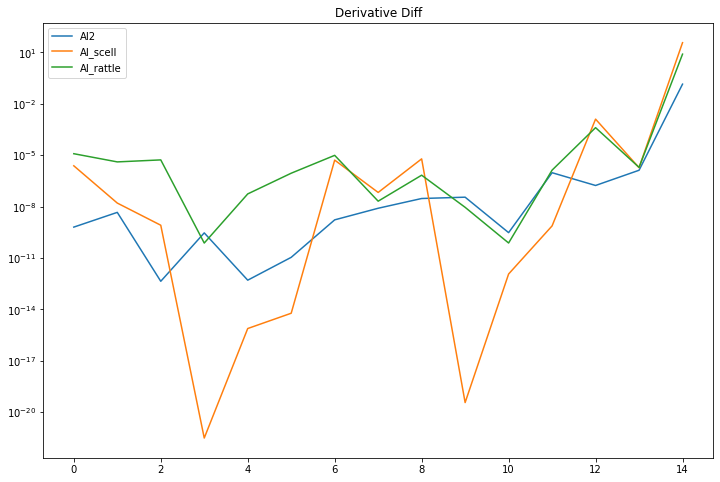

In [134]:
diff_2 = abs(derivs_2 - aderivs_2)
diff_all = abs(derivs_all - aderivs_all)
diff_rat = abs(derivs_rat - aderivs_rat)
diffs = [diff_2,diff_all,diff_rat]
titles = ['Al2','Al_scell','Al_rattle']
x = np.linspace(0,14,15,dtype=int)
fig,ax = plt.subplots(figsize=(12,8))
ax.semilogy(x,diffs[0][:15],label=titles[0])
ax.semilogy(x,diffs[1][:15],label=titles[1])
ax.semilogy(x,diffs[2][:15],label=titles[2])
ax.legend()
ax.set_title("Derivative Diff")

Text(0.5, 1.0, 'FP values')

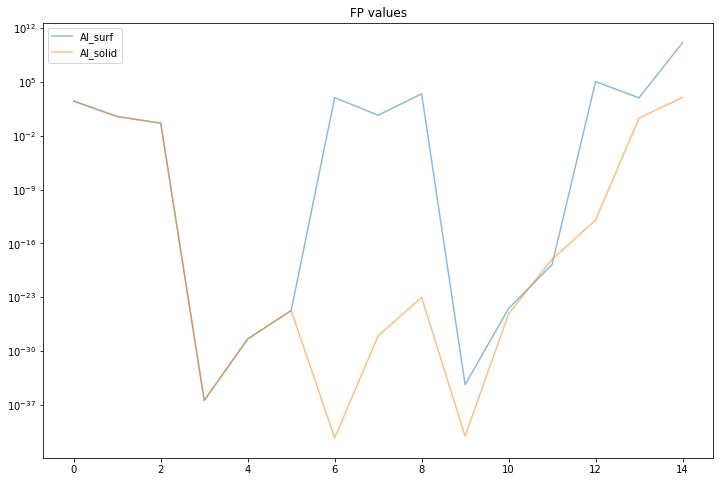

In [158]:
fps_all = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/unp_fps.csv',delimiter=',')
sfps_all = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/unp_solid_fps.csv',delimiter=',')
fig,ax = plt.subplots(figsize=(12,8))
ax.semilogy(x,fps_all[:15],label='Al_surf',alpha=0.5)
ax.semilogy(x,sfps_all[:15],label='Al_solid',alpha=0.5)
ax.legend()
ax.set_title('FP values')

In [154]:
fps_2 = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/double_fps.csv',delimiter=',')
fps_all = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/unp_fps.csv',delimiter=',')
fps_rattle = np.genfromtxt('/home/lucas/githubRepos/MCSH_C_Implementation/GMP/rattle_fps.csv',delimiter=',')

Text(0.5, 1.0, 'FP values')

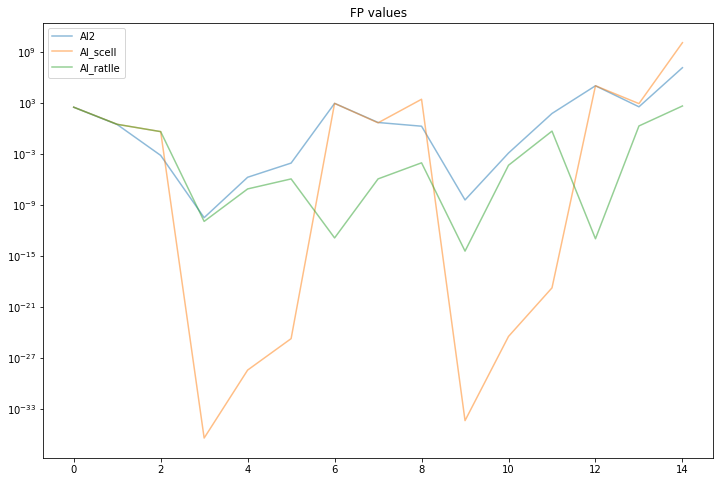

In [155]:
fig,ax = plt.subplots(figsize=(12,8))
ax.semilogy(x,fps_2[:15],label='Al2',alpha=0.5)
ax.semilogy(x,fps_all[:15],label='Al_scell',alpha=0.5)
ax.semilogy(x,fps_rattle[:15],label='Al_ratlle',alpha=0.5)
ax.legend()
ax.set_title('FP values')

Text(0.5, 1.0, 'Deriv values')

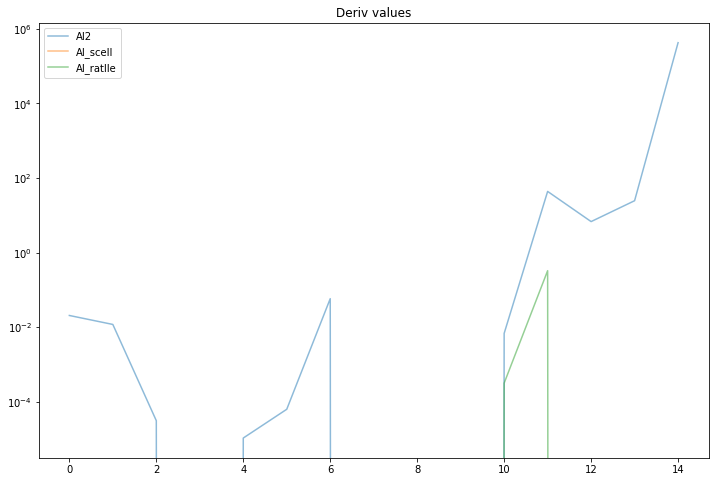

In [139]:
fig,ax = plt.subplots(figsize=(12,8))
ax.semilogy(x,aderivs_2[:15],label='Al2',alpha=0.5)
ax.semilogy(x,aderivs_all[:15],label='Al_scell',alpha=0.5)
ax.semilogy(x,aderivs_rat[:15],label='Al_ratlle',alpha=0.5)
ax.legend()
ax.set_title('Deriv values')

Text(0.5, 1.0, 'Deriv values')

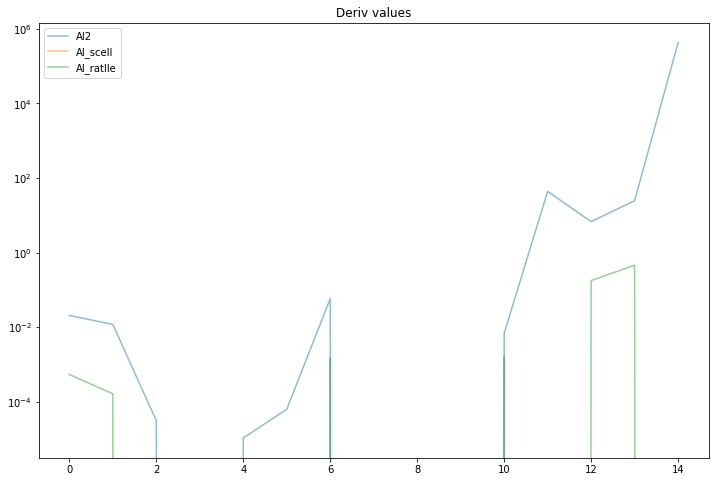

In [140]:
fig,ax = plt.subplots(figsize=(12,8))
ax.semilogy(x,aderivs_2[15:30],label='Al2',alpha=0.5)
ax.semilogy(x,aderivs_all[15:30],label='Al_scell',alpha=0.5)
ax.semilogy(x,aderivs_rat[15:30],label='Al_ratlle',alpha=0.5)
ax.legend()
ax.set_title('Deriv values')

Text(0.5, 1.0, 'Deriv values')

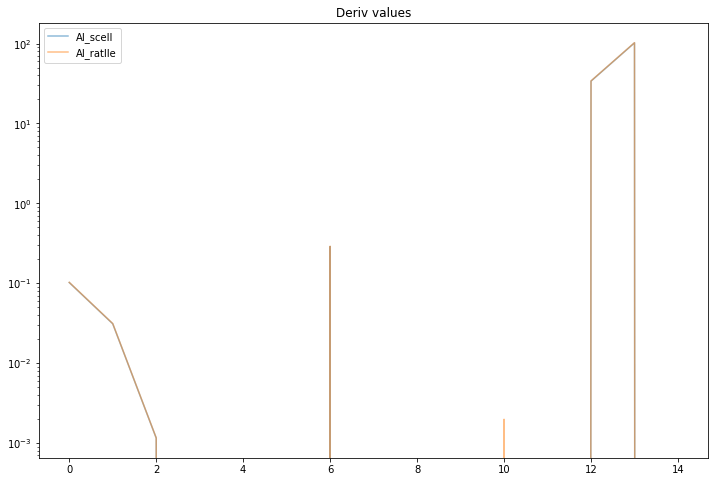

In [141]:
fig,ax = plt.subplots(figsize=(12,8))
ax.semilogy(x,aderivs_all[30:45],label='Al_scell',alpha=0.5)
ax.semilogy(x,aderivs_rat[30:45],label='Al_ratlle',alpha=0.5)
ax.legend()
ax.set_title('Deriv values')

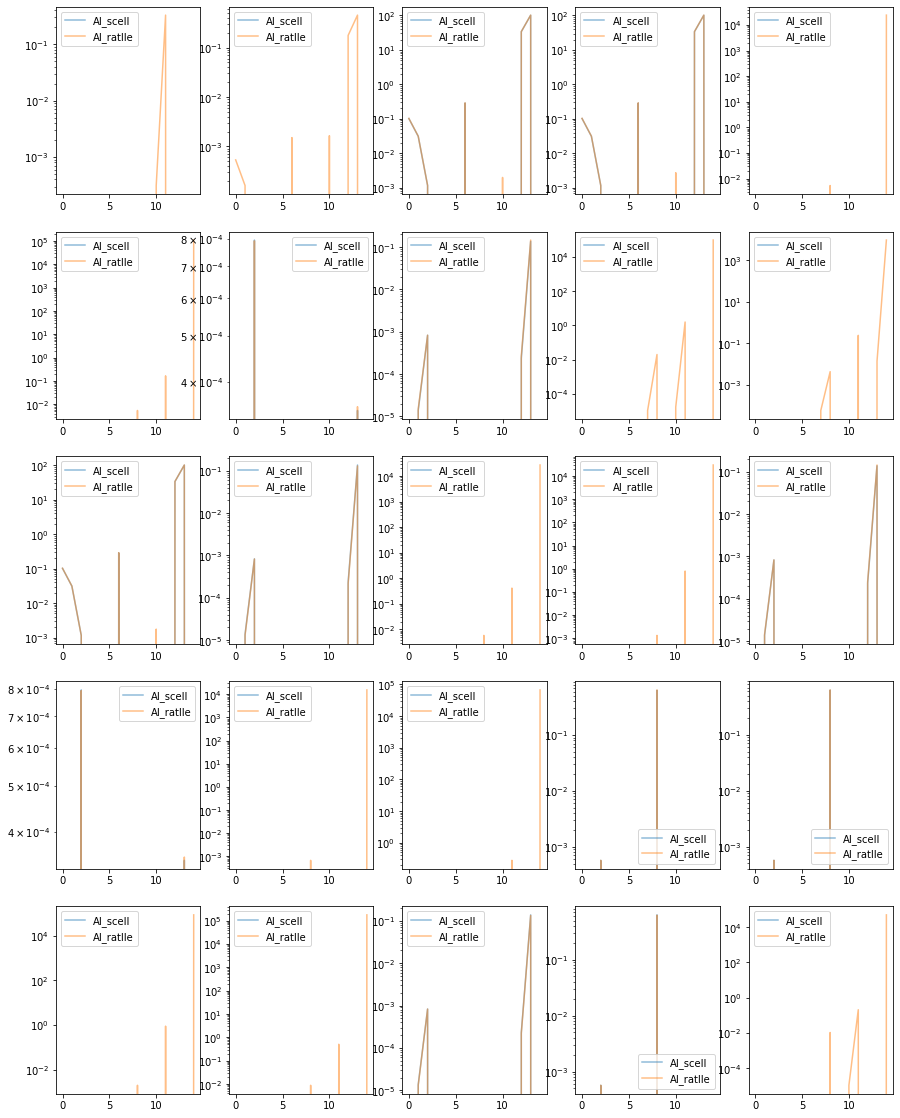

In [146]:
fig, ax = plt.subplots(5,5,figsize=(15,20))
axs = ax.ravel()
for idx,a in enumerate(axs):
    a.semilogy(x,aderivs_all[15*idx:15*(idx+1)],label='Al_scell',alpha=0.5)
    a.semilogy(x,aderivs_rat[15*idx:15*(idx+1)],label='Al_ratlle',alpha=0.5)
    a.legend()

# Status - local implementation is not working - memory issue. Need to trouble shoot. 
## Generate .inpt,.ion,.txt files for Rh+CO

In [3]:
home_dir = '/home/lucas/githubRepos/gmp_mlff/GMP_MLFF_SPARC/test/CO_sys'
os.chdir(home_dir)

In [7]:
Rh_CO = read('./Rh_CO_C1_top_GG_9.traj')
atomic_nums = Rh_CO.get_atomic_numbers()
Rh_indices,C_indices,O_indices = np.argwhere(atomic_nums==45).reshape(-1), np.argwhere(atomic_nums==6).reshape(-1), np.argwhere(atomic_nums==8).reshape(-1)
pos = Rh_CO.get_scaled_positions()
Rh_pos,C_pos,O_pos = pos[Rh_indices,:],pos[C_indices,:],pos[O_indices,:]
N_each = {'Rh':len(Rh_indices),'C':len(C_indices),'O':len(O_indices)}
Rh_tlist = ['   {:.15f}   {:.15f}   {:.15f}'.format(a[0],a[1],a[2]) for a in Rh_pos] 
C_tlist = ['   {:.15f}   {:.15f}   {:.15f}'.format(a[0],a[1],a[2]) for a in C_pos] 
O_tlist = ['   {:.15f}   {:.15f}   {:.15f}'.format(a[0],a[1],a[2]) for a in O_pos] 

Rh_list = ['ATOM_TYPE: {}\nN_TYPE_ATOM: {}\nPSEUDO_POT: {}.psp8\nCOORD_FRAC:'.format('Rh',len(Rh_indices),'Rh')]
C_list = ['ATOM_TYPE: {}\nN_TYPE_ATOM: {}\nPSEUDO_POT: {}.psp8\nCOORD_FRAC:'.format('C',len(C_indices),'C')]
O_list = ['ATOM_TYPE: {}\nN_TYPE_ATOM: {}\nPSEUDO_POT: {}.psp8\nCOORD_FRAC:'.format('O',len(O_indices),'O')]

final_Rh = Rh_list + Rh_tlist
final_C = C_list + C_tlist
final_O = O_list + O_tlist

with open('./RhCO.ion','w+') as fp:
    print('\n'.join(final_Rh),file=fp)
    print('\n',file=fp)
    print('\n'.join(final_C),file=fp)
    print('\n',file=fp)
    print('\n'.join(final_O),file=fp)

In [17]:
from ase.units import Angstrom, Bohr
cell = Rh_CO.get_cell()
new_cell = (cell[:,[0,1,2]]*Angstrom/Bohr)

In [19]:
print('{:.10f} {:.10f} {:.10f}'.format(new_cell[0,0],new_cell[1,1],new_cell[2,2]))

15.4736533452 12.6341850508 53.9083989124


In [34]:
Rh_gauss = pd.read_csv('Rh_pseudodensity_4.g',sep='\t',header=None)

In [37]:
Rh_gauss = pd.read_csv('Rh_pseudodensity_4.g',sep='\t',header=None)
Rh_gauss.loc[:,1] = Rh_gauss.loc[:,1]*Angstrom/Bohr
for idx,num in enumerate(Rh_gauss[1].values):
    print('{:.15f}\t{:.15f}'.format(Rh_gauss.loc[idx,0],num))

0.836619395642674	1.726378718253867
2624.266253851274996	15.712041405524701
70.367619740345646	10.121611836041751
-2689.851576147814740	15.633261073487663


In [38]:
C_gauss = pd.read_csv('C_pseudodensity_4.g',sep='\t',header=None)
C_gauss.loc[:,1] = C_gauss.loc[:,1]*Angstrom/Bohr
for idx,num in enumerate(C_gauss[1].values):
    print('{:.15f}\t{:.15f}'.format(C_gauss.loc[idx,0],num))

-1.894978929763598	28.155349572730067
0.341152645846150	1.939175677789377
-0.380495084912359	61.249213319413364
2.190017109543172	5.633802402038229


In [39]:
O_gauss = pd.read_csv('O_pseudodensity_4.g',sep='\t',header=None)
O_gauss.loc[:,1] = O_gauss.loc[:,1]*Angstrom/Bohr
for idx,num in enumerate(O_gauss[1].values):
    print('{:.15f}\t{:.15f}'.format(O_gauss.loc[idx,0],num))

-16.713951468437212	39.882605903045281
12.884402015190981	20.643820972115176
4.741066846660114	7.213164927786151
0.396135294316912	2.505579258408681


## Radial Distribution function implementation

In [50]:
import scipy as sp
from matplotlib import pyplot as plt
import re
import os
import numpy as np
 
def volume(r):
    """ volume of a sphere of radius r located at height z """
    volume = 4.0 / 3.0 * sp.pi * r**3
     
    return volume
 
def distance(a, b):
    """ get displacement in each coordinate and wrap w.r.t. lattice parameter """
    dx = abs(a[0] - b[0])
    x = min(dx, abs(A - dx))
     
    dy = abs(a[1] - b[1])
    y = min(dy, abs(B - dy))
     
    dz = abs(a[2] - b[2])
    z = min(dz, abs(C - dz))
     
    return sp.sqrt(x**2 + y**2 + z**2)
 
class Trajectory:
    def __init__(self, filename, skip, n_step, resolution=200):
        """ 
        filename         : path to the trajectory file 
        skip             : number of snapshots to be skipped between two configurations that are evaluated
                           (for example, if trajectory is 9000 steps long, and skip = 10, every tenth step
                           is evaluated, 900 steps in total; use skip = 1 to take every step of the MD)
        z_bot_interface  : average vertical coordinate for interface below water layer in Angstrom
        z_top_interface  : average vertical coordinate for interface above water layer in Angstrom
        interface_offset : distance between interface and region of water with bulk-like properties
        resolution       : number of points in the final radial distribution function """
         
        self.n_atoms = 38
        self.n_steps_total = n_step
         
        self.atom_list = ['Al' for x in range(self.n_atoms*self.n_steps_total)]
         
        self.skip = skip
        self.n_steps = self.n_steps_total // self.skip
         
        self.coordinates = sp.zeros((self.n_steps, self.n_atoms, 3))
        data = np.genfromtxt(filename,dtype=float)
        for step in range(self.n_steps):
            coords = sp.zeros((self.n_atoms, 3))
            for j in range(self.n_atoms):
                coords[j, :] = data[step*self.n_atoms+j,:]
             
            self.coordinates[step] = coords
         
        self.resolution = resolution
        self.compute_volume_per_h2o()
     
    def compute_volume_per_h2o(self):
        """ calculates the average volume per water molecule from the subset of configurations """
        """ sum up all oxygens belonging to water in the bulk region """
         
        """ devide the volume of the bulk region by the average number of molecules per step """
        self.volume_per_h2o = A * B * C / 108
     
    def compute_radial_distribution(self):
        """ no reason to go above half of the smallest lattice parameter as mirror images start 
        to be double-counted """
        r_cutoff = min(A, B) / 2.0
        dr = r_cutoff / self.resolution
        volumes = sp.zeros(self.resolution)
         
        self.radii = sp.linspace(0.0, self.resolution * dr, self.resolution)
        self.g_of_r = sp.zeros(self.resolution)
         
        for step in range(self.n_steps):
            print('{:4d} : {:4d}'.format(step, self.n_steps))
             
            """ isolate all liquid water molecules based on the position of the oxygen atoms """
            data_oxygen = []
            for i, atom in enumerate(self.coordinates[step]):
                data_oxygen.append(atom)
            data_oxygen = sp.array(data_oxygen)
             
            """ loop over each pair of H2O molecules, calculate their distance, build a histogram 
            each pair is evaluated as two contributions to the distribution function """
            for i, oxygen1 in enumerate(data_oxygen):
                for j in range(self.resolution):
                    r1 = j * dr
                    r2 = r1 + dr
                    v1 = volume(r1)
                    v2 = volume(r2)
                    volumes[j] += v2 - v1
                 
                for oxygen2 in data_oxygen[i:]:
                    dist = distance(oxygen1, oxygen2)
                    index = int(dist / dr)
                    if 0 < index < self.resolution:
                        self.g_of_r[index] += 2.0
         
        """ normalize by the volume of the spherical shell corresponding to each radius """
        for i, value in enumerate(self.g_of_r):
            self.g_of_r[i] = value * self.volume_per_h2o / volumes[i]
         
    def plot(self, filename=""):
        """ plots the radial distribution function
        if filename is specified, prints it to file as a pdf """
         
        if not self.g_of_r.any():
            print('compute the radial distribution function first\n')
            return
         
        plt.xlabel('r (Å)')
        plt.ylabel('g$_{O-O}$(r)')
        plt.plot(self.radii, self.g_of_r)
         
        if filename:
            plt.savefig('{}'.format(filename), dpi=300, bbox='tight', format='pdf')
         
        plt.show()

In [49]:
#Get .aimd in xyz format
import os
import re
import numpy as np

filename ='/home/lucas/RhCO_GMP.aimd'
with open(filename, 'r') as f_log:
    f_log_content = [ line.strip() for line in f_log ]
index=0
tracker = 0
R_coords = []
natom =38
for idx,line in enumerate(f_log_content):
    if re.findall(r':R:',line) == [':R:']:
        for i in range(natom):
            ftemp = []
            temp = f_log_content[idx+1+i].split()
            #print(temp)
            ftemp.append(float(temp[0]))
            ftemp.append(float(temp[1]))
            ftemp.append(float(temp[2]))
            R_coords.append(ftemp)
        tracker += 1
    index=index+38
    if tracker > 100:
        break
R_coords = np.array(R_coords)
np.savetxt('/home/lucas/RhCO_GMP.txt',R_coords)


In [51]:
A = 15.47
B = 12.63
C = 53.9
 
DFT = Trajectory('/home/lucas/RhCO_DFT.txt', 1, 100)
DFT.compute_radial_distribution()
MLFF = Trajectory('/home/lucas/RhCO_GMP.txt', 1, 100)
MLFF.compute_radial_distribution()
SOAP = Trajectory('/home/lucas/RhCO_soap.txt', 1, 100)
SOAP.compute_radial_distribution()
#TiO2_H2O.plot('Al_DFT.svg')

/home/lucas/anaconda3/envs/amptorch_master/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
/home/lucas/anaconda3/envs/amptorch_master/lib/python3.6/site-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
/home/lucas/anaconda3/envs/amptorch_master/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
/home/lucas/anaconda3/envs/amptorch_master/lib/python3.6/site-packages/ipykernel_launcher.py:72: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
/home/lucas/anaconda3/envs/amptorch_master/lib/python3.6/site-packages/ipykernel_launcher.py:73: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use

   0 :  100
   1 :  100
   2 :  100
   3 :  100
   4 :  100
   5 :  100
   6 :  100
   7 :  100
   8 :  100
   9 :  100
  10 :  100
  11 :  100
  12 :  100
  13 :  100
  14 :  100
  15 :  100
  16 :  100
  17 :  100
  18 :  100
  19 :  100
  20 :  100
  21 :  100
  22 :  100
  23 :  100
  24 :  100
  25 :  100
  26 :  100
  27 :  100
  28 :  100
  29 :  100
  30 :  100
  31 :  100
  32 :  100
  33 :  100
  34 :  100
  35 :  100
  36 :  100
  37 :  100
  38 :  100
  39 :  100
  40 :  100
  41 :  100
  42 :  100
  43 :  100
  44 :  100
  45 :  100
  46 :  100
  47 :  100
  48 :  100
  49 :  100
  50 :  100
  51 :  100
  52 :  100
  53 :  100
  54 :  100
  55 :  100
  56 :  100
  57 :  100
  58 :  100
  59 :  100
  60 :  100
  61 :  100
  62 :  100
  63 :  100
  64 :  100
  65 :  100
  66 :  100
  67 :  100
  68 :  100
  69 :  100
  70 :  100
  71 :  100
  72 :  100
  73 :  100
  74 :  100
  75 :  100
  76 :  100
  77 :  100
  78 :  100
  79 :  100
  80 :  100
  81 :  100
  82 :  100
  83

In [44]:
def plot(objs, filename=""):
    """ plots the radial distribution function
    if filename is specified, prints it to file as a pdf """

    fig, ax = plt.subplots(figsize=(7,7),dpi=500)
    ax.set_xlabel('r (Å)')
    ax.set_ylabel('g$_{O-O}$(r)')
    ax.plot(objs[0].radii/1.89, objs[0].g_of_r/1.89,label='DFT')
    ax.plot(objs[1].radii/1.89, objs[1].g_of_r/1.89,label='SOAP')
    ax.plot(objs[2].radii/1.89, objs[2].g_of_r/1.89,label='GMP')
    ax.legend()
    if filename:
        fig.savefig('{}'.format(filename))

    plt.show()

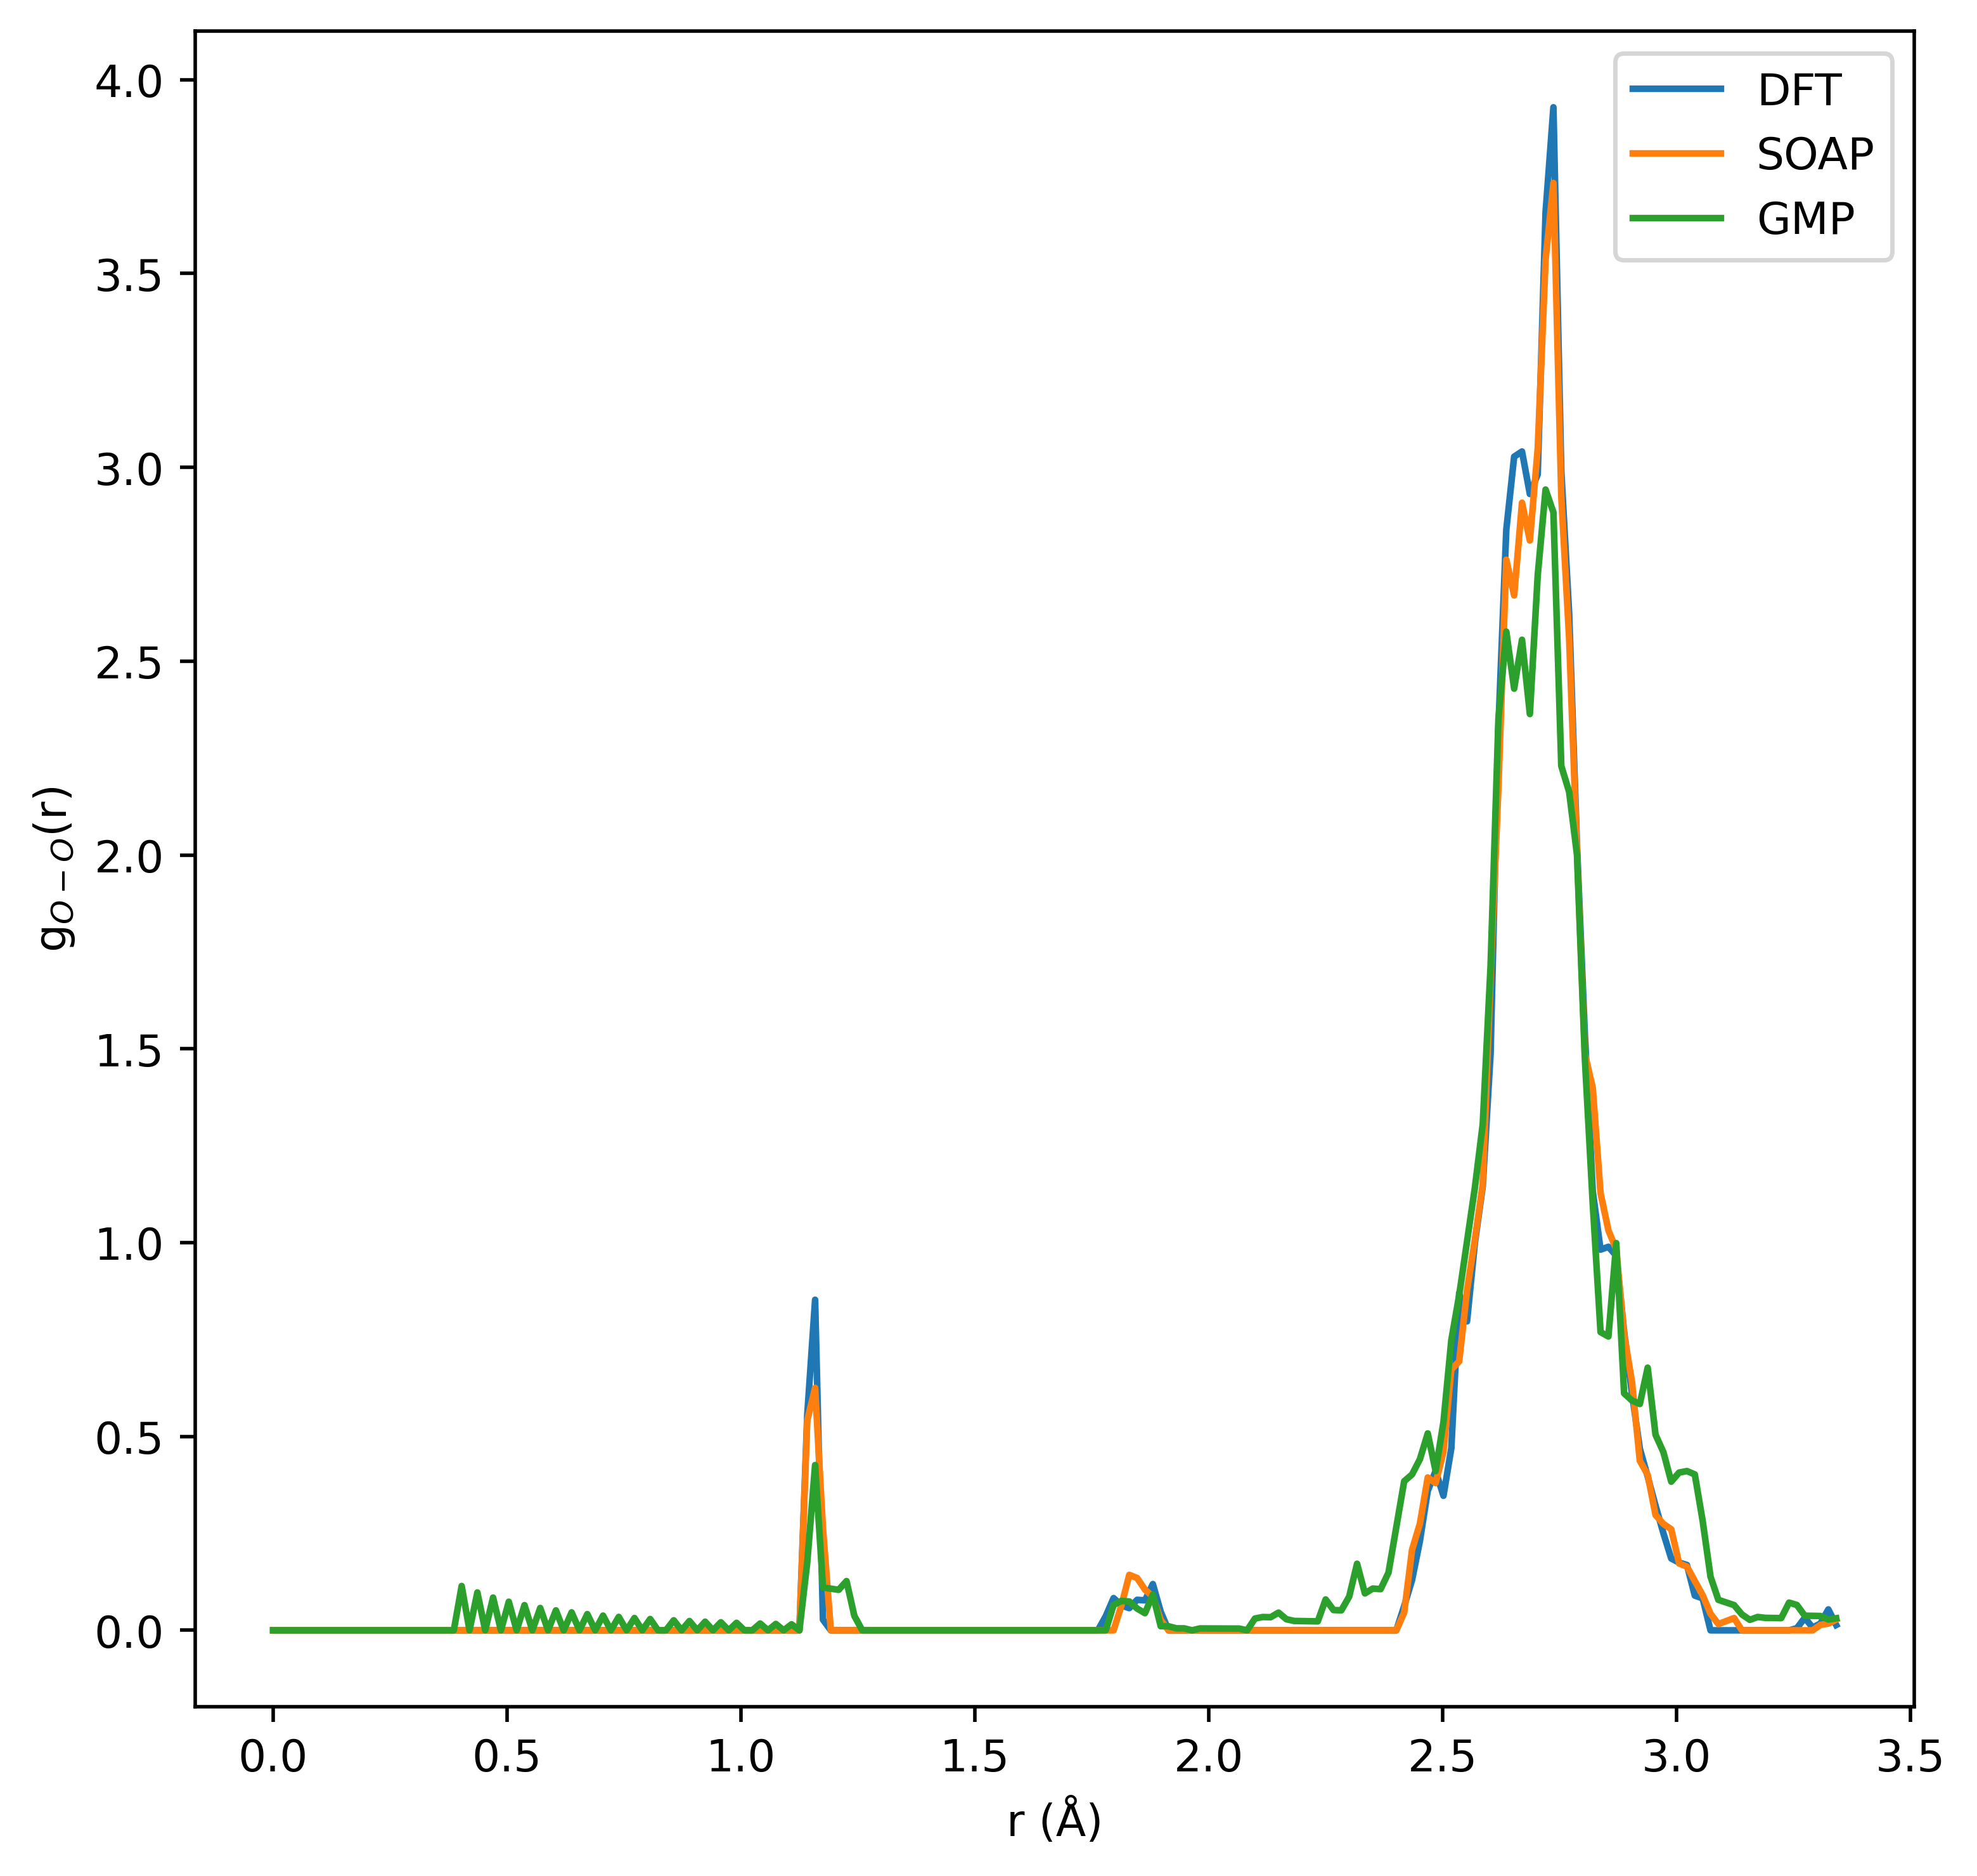

In [52]:
plot([DFT,SOAP,MLFF],'/home/lucas/rdf_RhCO.png')

In [38]:
for _file in range(2):
    x = []
    if _file <1:
        for i in range(10800):
            x += ['{}\t{}\t{}'.format(10*np.random.rand(),10*np.random.rand(),10*np.random.rand())]
    else:
        for i in range(10800):
            x += ['{}\t{}\t{}'.format(10*np.random.randn(),10*np.random.randn(),10*np.random.randn())]
    with open('/home/lucas/rand_pos{}.txt'.format(_file),'w') as fp:
        print('\n'.join(x),file=fp)

In [37]:
10*np.random.rand()

0.8514740606691829

/home/lucas/anaconda3/envs/amptorch_master/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
/home/lucas/anaconda3/envs/amptorch_master/lib/python3.6/site-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
/home/lucas/anaconda3/envs/amptorch_master/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
/home/lucas/anaconda3/envs/amptorch_master/lib/python3.6/site-packages/ipykernel_launcher.py:72: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
/home/lucas/anaconda3/envs/amptorch_master/lib/python3.6/site-packages/ipykernel_launcher.py:73: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use

   0 :  100
   1 :  100
   2 :  100
   3 :  100
   4 :  100
   5 :  100
   6 :  100
   7 :  100
   8 :  100
   9 :  100
  10 :  100
  11 :  100
  12 :  100
  13 :  100
  14 :  100
  15 :  100
  16 :  100
  17 :  100
  18 :  100
  19 :  100
  20 :  100
  21 :  100
  22 :  100
  23 :  100
  24 :  100
  25 :  100
  26 :  100
  27 :  100
  28 :  100
  29 :  100
  30 :  100
  31 :  100
  32 :  100
  33 :  100
  34 :  100
  35 :  100
  36 :  100
  37 :  100
  38 :  100
  39 :  100
  40 :  100
  41 :  100
  42 :  100
  43 :  100
  44 :  100
  45 :  100
  46 :  100
  47 :  100
  48 :  100
  49 :  100
  50 :  100
  51 :  100
  52 :  100
  53 :  100
  54 :  100
  55 :  100
  56 :  100
  57 :  100
  58 :  100
  59 :  100
  60 :  100
  61 :  100
  62 :  100
  63 :  100
  64 :  100
  65 :  100
  66 :  100
  67 :  100
  68 :  100
  69 :  100
  70 :  100
  71 :  100
  72 :  100
  73 :  100
  74 :  100
  75 :  100
  76 :  100
  77 :  100
  78 :  100
  79 :  100
  80 :  100
  81 :  100
  82 :  100
  83

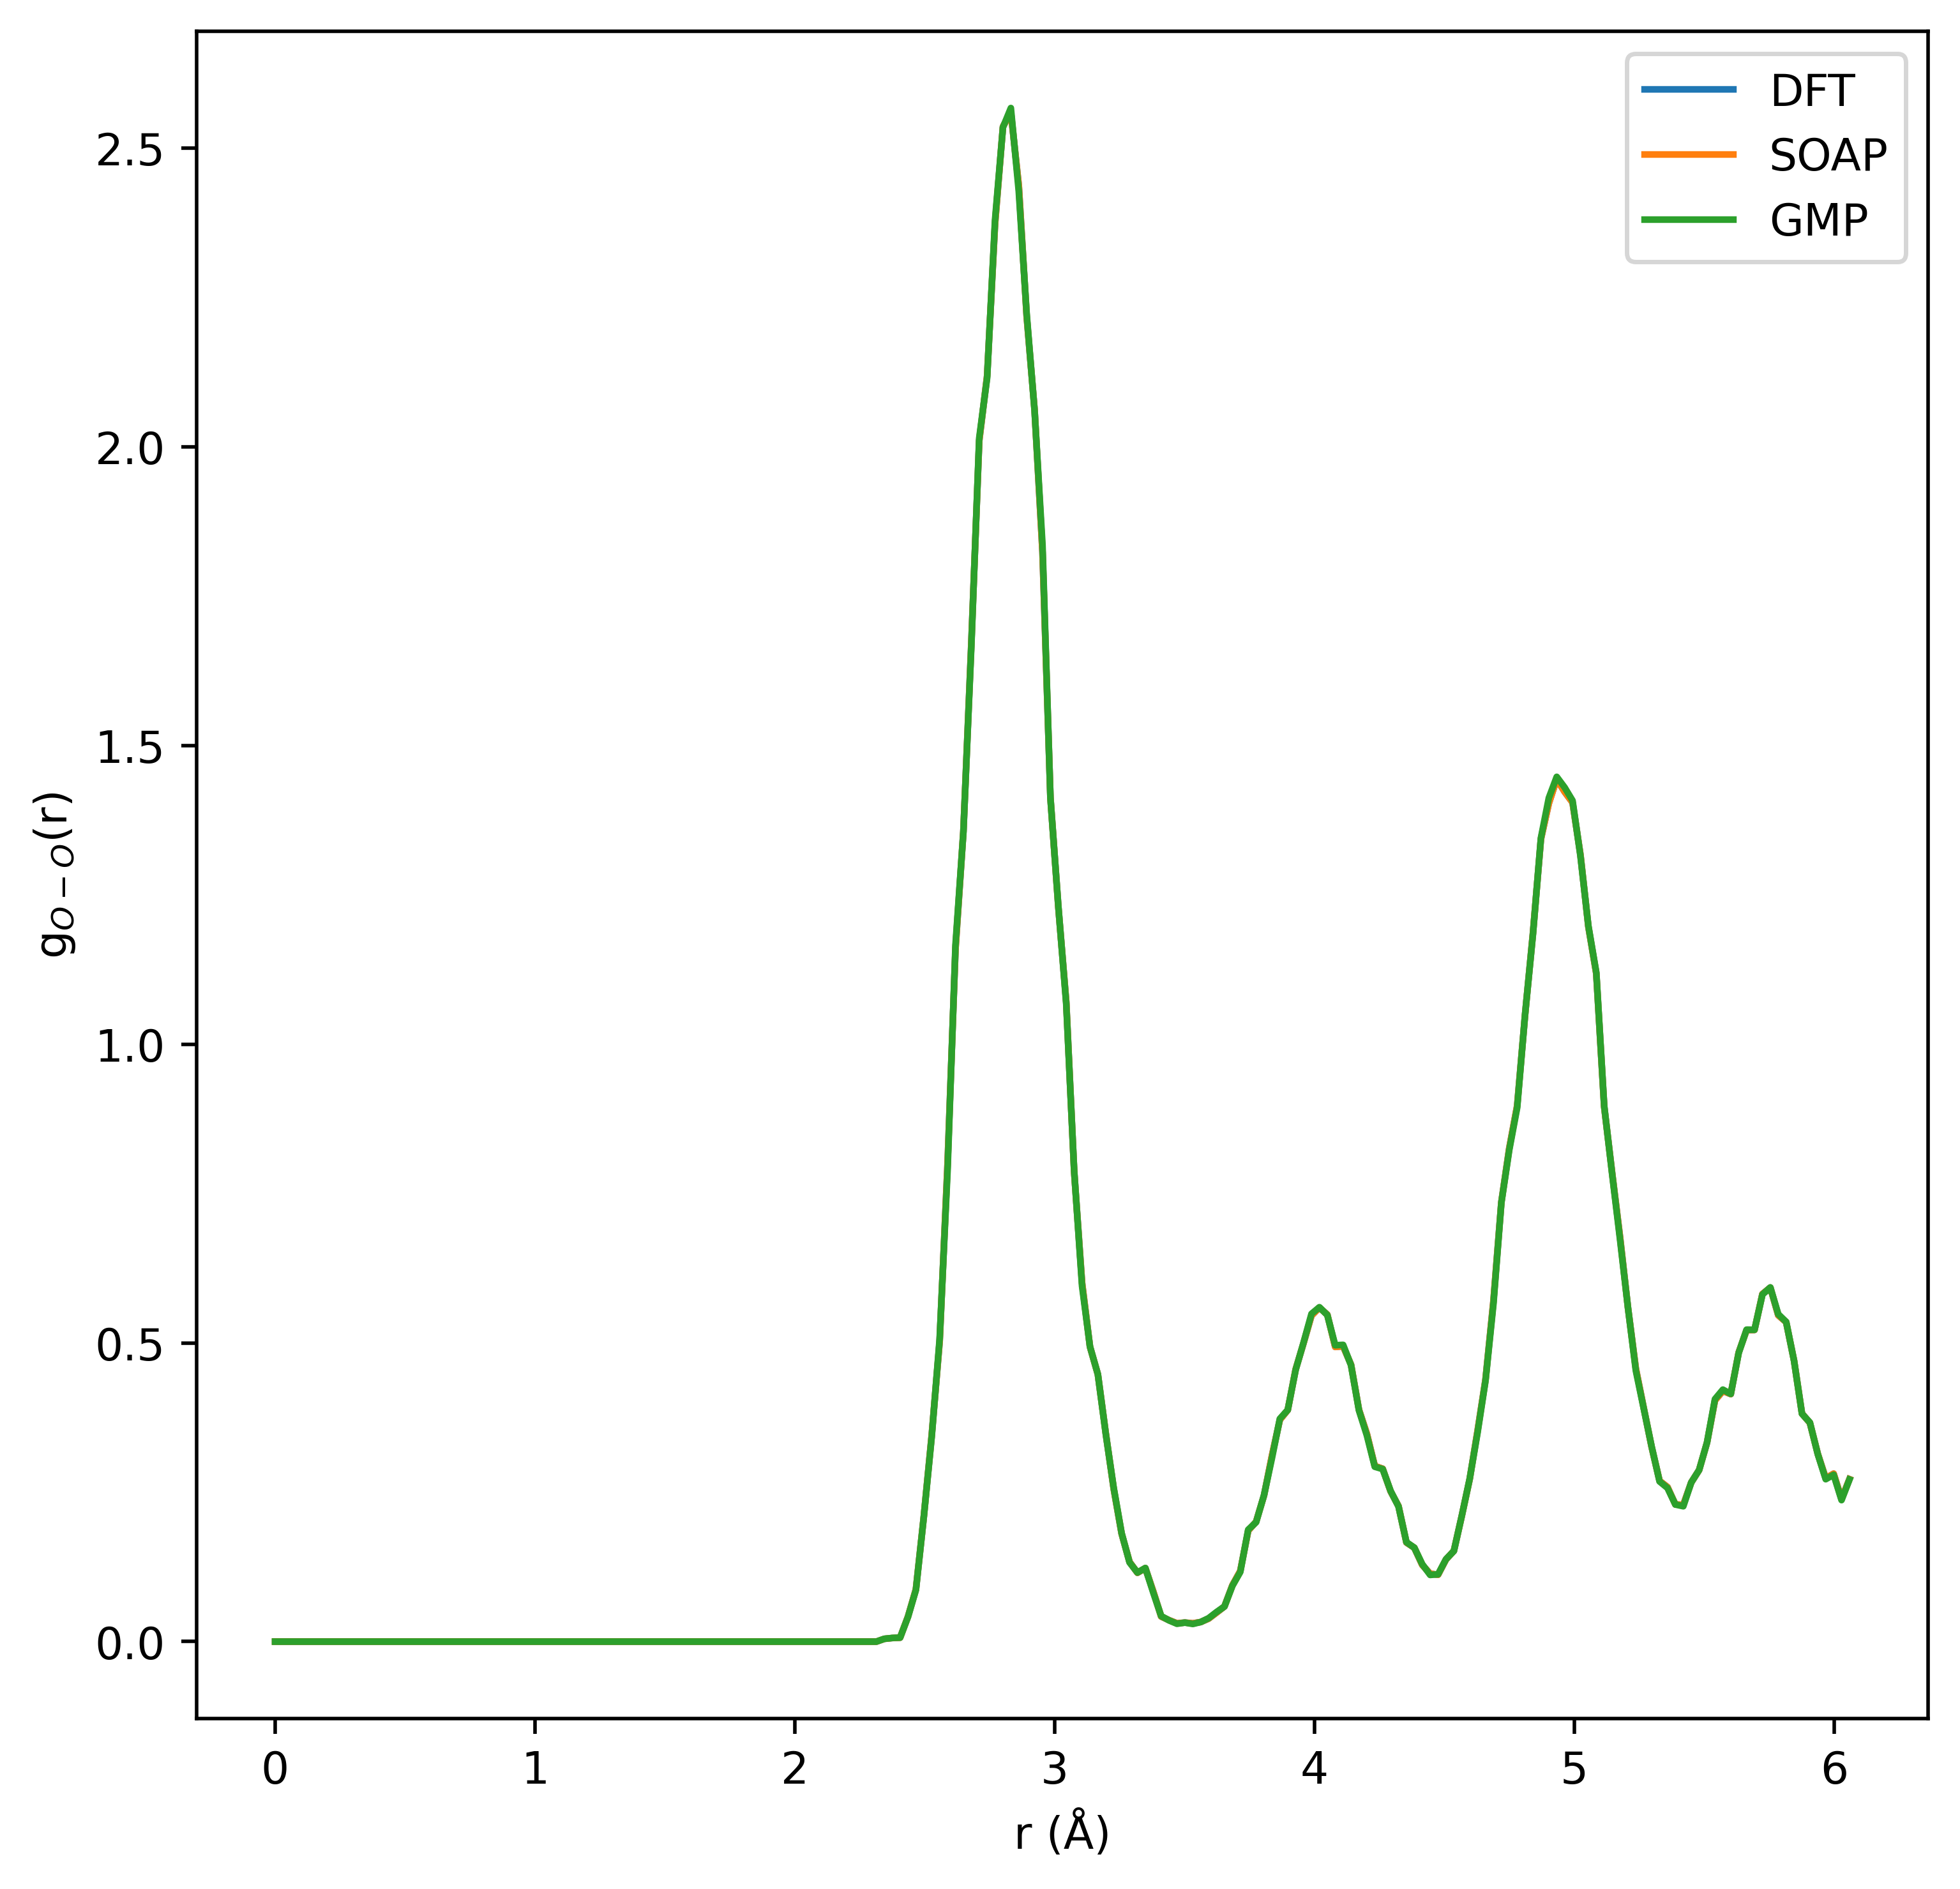

In [39]:
RAND0 = Trajectory('/home/lucas/extract.txt', 1, 100)
RAND0.compute_radial_distribution()
RAND1 = Trajectory('/home/lucas/extract_mlff.txt', 1, 98)
RAND1.compute_radial_distribution()

plot([DFT,RAND0,RAND1],'/home/lucas/rdf.png')